In [1]:
import pandas as pd
import numpy as np

os = 'mac'

if os == 'win':
    path = ''
else:
    path = '/Users/fabienaugsburger/Documents/GitHub/master-project/'

In [3]:
# open each csv file and read it into a pandas dataframe

name_of_variables = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets/variable_list_24_v2_1.csv')

for i in range(0, len(name_of_variables)):

    print(name_of_variables.iloc[i])

    locals()[f'max_{name_of_variables.iloc[i]}'] = pd.DataFrame()
    locals()[f'min_{name_of_variables.iloc[i]}'] = pd.DataFrame()
    locals()[f'mean_{name_of_variables.iloc[i]}'] = pd.DataFrame()
    locals()[f'sigma_{name_of_variables.iloc[i]}'] = pd.DataFrame()

    for j in range (1,96+1):
        if name_of_variables.iloc[i] == 'geopotential':
            for k in [500, 1000]:
                df_max_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + name_of_variables.iloc[i] + '/storm_' + str(j) + '/max_'+ str(j) + '_' + str(k) + '.csv')
                df_min_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + name_of_variables.iloc[i] + '/storm_' + str(j) + '/min_'+ str(j) + '_' + str(k) + '.csv')
                df_mean_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + name_of_variables.iloc[i] + '/storm_' + str(j) + '/mean_'+ str(j) + '_' + str(k) + '.csv')
                df_sigma_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + name_of_variables.iloc[i] + '/storm_' + str(j) + '/std_'+ str(j) + '_' + str(k) + '.csv')

                '''if 'geopotential' in name_of_variables.values:
                    # Remove 'geopotential' from name_of_variables
                    name_of_variables = name_of_variables[name_of_variables != 'geopotential']
                    # Add 'geopotential_500' and 'geopotential_1000' to name_of_variables
                    name_of_variables = name_of_variables.append(pd.Series(['geopotential_500', 'geopotential_1000']), ignore_index=True)'''

        else:
            df_max_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + name_of_variables.iloc[i] + '/storm_' + str(j) + '/max_'+ str(j) + '_0.csv')
            df_min_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + name_of_variables.iloc[i] + '/storm_' + str(j) + '/min_'+ str(j) + '_0.csv')
            df_mean_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + name_of_variables.iloc[i] + '/storm_' + str(j) + '/mean_'+ str(j) + '_0.csv')
            df_sigma_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + name_of_variables.iloc[i] + '/storm_' + str(j) + '/std_'+ str(j) + '_0.csv')

        df_max_temp = df_max_temp.drop(columns = ['Unnamed: 0'])
        df_min_temp = df_min_temp.drop(columns = ['Unnamed: 0'])
        df_mean_temp = df_mean_temp.drop(columns = ['Unnamed: 0'])
        df_sigma_temp = df_sigma_temp.drop(columns = ['Unnamed: 0'])

        locals()[f'max_{name_of_variables.iloc[i]}'] = pd.concat([locals()[f'max_{name_of_variables.iloc[i]}'], df_max_temp], axis=0)
        locals()[f'min_{name_of_variables.iloc[i]}'] = pd.concat([locals()[f'min_{name_of_variables.iloc[i]}'], df_min_temp], axis=0)
        locals()[f'mean_{name_of_variables.iloc[i]}'] = pd.concat([locals()[f'mean_{name_of_variables.iloc[i]}'], df_mean_temp], axis=0)
        locals()[f'sigma_{name_of_variables.iloc[i]}'] = pd.concat([locals()[f'sigma_{name_of_variables.iloc[i]}'], df_sigma_temp], axis=0)

10m_u_component_of_wind
10m_v_component_of_wind
2m_dewpoint_temperature
2m_temperature
cloud_base_height
convective_available_potential_energy
convective_inhibition
convective_precipitation
convective_rain_rate
convective_snowfall
geopotential
high_cloud_cover
instantaneous_10m_wind_gust
k_index
large_scale_precipitation
large_scale_snowfall
mean_large_scale_precipitation_rate
mean_top_net_long_wave_radiation_flux
mean_top_net_short_wave_radiation_flux
mean_total_precipitation_rate
mean_sea_level_pressure
mean_surface_latent_heat_flux
mean_surface_net_long_wave_radiation_flux
mean_surface_net_short_wave_radiation_flux
mean_vertically_integrated_moisture_divergence
surface_pressure
total_precipitation
total_totals_index


In [5]:
# test 2

# open each csv file and read it into a pandas dataframe
name_of_variables = pd.read_csv(path+'/variable_list_24_v2_1.csv')
name_of_variables = name_of_variables['variable'].tolist()

number_of_storms_test2 = 5

# Create a new list of variables
new_name_of_variables = []
for variable in name_of_variables:
    
    if variable == 'geopotential':
        new_name_of_variables.extend(['geopotential_500', 'geopotential_1000'])
    else:
        new_name_of_variables.append(variable)

# Iterate over the new list of variables
for i in range(0, len(new_name_of_variables)):

    print(new_name_of_variables[i])

    locals()[f'max_{new_name_of_variables[i]}'] = pd.DataFrame()
    locals()[f'min_{new_name_of_variables[i]}'] = pd.DataFrame()
    locals()[f'mean_{new_name_of_variables[i]}'] = pd.DataFrame()
    locals()[f'sigma_{new_name_of_variables[i]}'] = pd.DataFrame()

    for j in range (1,number_of_storms_test2+1):
        if 'geopotential' in new_name_of_variables[i]:
            continue
            for k in [500, 1000]:
                df_max_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/geopotential/storm_' + str(j) + '/max_'+ str(j) + '_' + str(k) + '.csv')
                df_min_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/geopotential/storm_' + str(j) + '/min_'+ str(j) + '_' + str(k) + '.csv')
                df_mean_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/geopotential/storm_' + str(j) + '/mean_'+ str(j) + '_' + str(k) + '.csv')
                df_sigma_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/geopotential/storm_' + str(j) + '/std_'+ str(j) + '_' + str(k) + '.csv')

        else:
            df_max_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + new_name_of_variables[i] + '/storm_' + str(j) + '/max_'+ str(j) + '_0.csv')
            df_min_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + new_name_of_variables[i] + '/storm_' + str(j) + '/min_'+ str(j) + '_0.csv')
            df_mean_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + new_name_of_variables[i] + '/storm_' + str(j) + '/mean_'+ str(j) + '_0.csv')
            df_sigma_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/' + new_name_of_variables[i] + '/storm_' + str(j) + '/std_'+ str(j) + '_0.csv')

        df_max_temp = df_max_temp.drop(columns = ['Unnamed: 0'])
        df_min_temp = df_min_temp.drop(columns = ['Unnamed: 0'])
        df_mean_temp = df_mean_temp.drop(columns = ['Unnamed: 0'])
        df_sigma_temp = df_sigma_temp.drop(columns = ['Unnamed: 0'])

        locals()[f'max_{new_name_of_variables[i]}'] = pd.concat([locals()[f'max_{new_name_of_variables[i]}'], df_max_temp], axis=0)
        locals()[f'min_{new_name_of_variables[i]}'] = pd.concat([locals()[f'min_{new_name_of_variables[i]}'], df_min_temp], axis=0)
        locals()[f'mean_{new_name_of_variables[i]}'] = pd.concat([locals()[f'mean_{new_name_of_variables[i]}'], df_mean_temp], axis=0)
        locals()[f'sigma_{new_name_of_variables[i]}'] = pd.concat([locals()[f'sigma_{new_name_of_variables[i]}'], df_sigma_temp], axis=0)
        
for k in [500, 1000]:
    locals()[f'max_geopotential_{k}'] = pd.DataFrame()
    locals()[f'min_geopotential_{k}'] = pd.DataFrame()
    locals()[f'mean_geopotential_{k}'] = pd.DataFrame()
    locals()[f'sigma_geopotential_{k}'] = pd.DataFrame()
    
    for j in range (1,number_of_storms_test2+1):
        df_max_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/geopotential/storm_' + str(j) + '/max_'+ str(j) + '_' + str(k) + '.csv')
        df_min_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/geopotential/storm_' + str(j) + '/min_'+ str(j) + '_' + str(k) + '.csv')
        df_mean_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/geopotential/storm_' + str(j) + '/mean_'+ str(j) + '_' + str(k) + '.csv')
        df_sigma_temp = pd.read_csv('/Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h/geopotential/storm_' + str(j) + '/std_'+ str(j) + '_' + str(k) + '.csv')

        df_max_temp = df_max_temp.drop(columns = ['Unnamed: 0'])
        df_min_temp = df_min_temp.drop(columns = ['Unnamed: 0'])
        df_mean_temp = df_mean_temp.drop(columns = ['Unnamed: 0'])
        df_sigma_temp = df_sigma_temp.drop(columns = ['Unnamed: 0'])

        locals()[f'max_geopotential_{k}'] = pd.concat([locals()[f'max_geopotential_{k}'], df_min_temp], axis=0)
        locals()[f'min_geopotential_{k}'] = pd.concat([locals()[f'min_geopotential_{k}'], df_min_temp], axis=0)
        locals()[f'mean_geopotential_{k}'] = pd.concat([locals()[f'mean_geopotential_{k}'], df_mean_temp], axis=0)
        locals()[f'sigma_geopotential_{k}'] = pd.concat([locals()[f'sigma_geopotential_{k}'], df_min_temp], axis=0)

10m_u_component_of_wind
10m_v_component_of_wind
2m_dewpoint_temperature
2m_temperature
cloud_base_height
convective_available_potential_energy
convective_inhibition
convective_precipitation
convective_rain_rate
convective_snowfall
geopotential_500
geopotential_1000
high_cloud_cover
instantaneous_10m_wind_gust
k_index
large_scale_precipitation
large_scale_snowfall
mean_large_scale_precipitation_rate
mean_top_net_long_wave_radiation_flux
mean_top_net_short_wave_radiation_flux
mean_total_precipitation_rate
mean_sea_level_pressure
mean_surface_latent_heat_flux
mean_surface_net_long_wave_radiation_flux
mean_surface_net_short_wave_radiation_flux
mean_vertically_integrated_moisture_divergence
surface_pressure
total_precipitation
total_totals_index


In [25]:
# test 3

# open each csv file and read it into a pandas dataframe
name_of_variables = pd.read_csv(path+'/variable_list_24_v2_1.csv')
name_of_variables = name_of_variables['variable'].tolist()
original_variables = name_of_variables

number_of_storms_test3 = 96
dataset = 'datasets_3h_EU/'

# Create a new list of variables
new_name_of_variables = []
for variable in name_of_variables:
    if variable == 'geopotential':
        new_name_of_variables.extend(['geopotential_500', 'geopotential_1000'])
    else:
        new_name_of_variables.append(variable)

# Iterate over the new list of variables
for i in range(0, len(new_name_of_variables)):

    print(new_name_of_variables[i])

    locals()[f'max_{new_name_of_variables[i]}'] = pd.DataFrame()
    locals()[f'min_{new_name_of_variables[i]}'] = pd.DataFrame()
    locals()[f'mean_{new_name_of_variables[i]}'] = pd.DataFrame()
    locals()[f'sigma_{new_name_of_variables[i]}'] = pd.DataFrame()

    for j in range (1,number_of_storms_test3+1):
        if 'geopotential' in new_name_of_variables[i]:
            continue
        else:
            try:
                df_max_temp = pd.read_csv(path + dataset + new_name_of_variables[i] + '/storm_' + str(j) + '/max_'+ str(j) + '_0.csv')
                df_min_temp = pd.read_csv(path + dataset + new_name_of_variables[i] + '/storm_' + str(j) + '/min_'+ str(j) + '_0.csv')
                df_mean_temp = pd.read_csv(path + dataset + new_name_of_variables[i] + '/storm_' + str(j) + '/mean_'+ str(j) + '_0.csv')
                df_sigma_temp = pd.read_csv(path + dataset + new_name_of_variables[i] + '/storm_' + str(j) + '/std_'+ str(j) + '_0.csv')
            except FileNotFoundError:
                print('Error in reading file: ' + path + dataset + new_name_of_variables[i] + '/storm_' + str(j) + '/max_'+ str(j) + '_0.csv')
                continue
        df_max_temp = df_max_temp.drop(columns = ['Unnamed: 0'])
        df_min_temp = df_min_temp.drop(columns = ['Unnamed: 0'])
        df_mean_temp = df_mean_temp.drop(columns = ['Unnamed: 0'])
        df_sigma_temp = df_sigma_temp.drop(columns = ['Unnamed: 0'])

        df_max_temp = df_max_temp.rename(columns = {'0': f'storm_{j}'})
        df_min_temp = df_min_temp.rename(columns = {'0': f'storm_{j}'})
        df_mean_temp = df_mean_temp.rename(columns = {'0': f'storm_{j}'})
        df_sigma_temp = df_sigma_temp.rename(columns = {'0': f'storm_{j}'})

        locals()[f'max_{new_name_of_variables[i]}']= pd.concat([locals()[f'max_{new_name_of_variables[i]}'] ,df_max_temp], axis=1)#[f'storm_{j}'] = df_max_temp['0']
        locals()[f'min_{new_name_of_variables[i]}']= pd.concat([locals()[f'min_{new_name_of_variables[i]}'], df_min_temp], axis=1)#[f'storm_{j}'] = df_min_temp['0']# = pd.concat([locals()[f'min_{new_name_of_variables[i]}'], df_min_temp], axis=0)
        locals()[f'mean_{new_name_of_variables[i]}']= pd.concat([locals()[f'mean_{new_name_of_variables[i]}'], df_mean_temp], axis=1)#[f'storm_{j}'] = df_mean_temp['0'] #= pd.concat([locals()[f'mean_{new_name_of_variables[i]}'], df_mean_temp], axis=0)
        locals()[f'sigma_{new_name_of_variables[i]}']= pd.concat([locals()[f'sigma_{new_name_of_variables[i]}'], df_sigma_temp], axis=1)#[f'storm_{j}'] = df_sigma_temp['0'] #= pd.concat([locals()[f'sigma_{new_name_of_variables[i]}'], df_sigma_temp], axis=0)

for k in [500, 1000]:
    locals()[f'max_geopotential_{k}'] = pd.DataFrame()
    locals()[f'min_geopotential_{k}'] = pd.DataFrame()
    locals()[f'mean_geopotential_{k}'] = pd.DataFrame()
    locals()[f'sigma_geopotential_{k}'] = pd.DataFrame()
    for j in range (1,number_of_storms_test3+1):
        try:
            df_max_temp = pd.read_csv(path + dataset + 'geopotential/storm_' + str(j) + '/max_'+ str(j) + '_' + str(k) + '.csv')
            df_min_temp = pd.read_csv(path + dataset + 'geopotential/storm_' + str(j) + '/min_'+ str(j) + '_' + str(k) + '.csv')
            df_mean_temp = pd.read_csv(path + dataset + 'geopotential/storm_' + str(j) + '/mean_'+ str(j) + '_' + str(k) + '.csv')
            df_sigma_temp = pd.read_csv(path + dataset + 'geopotential/storm_' + str(j) + '/std_'+ str(j) + '_' + str(k) + '.csv')
        except FileNotFoundError:
            print('Error in reading file: ' + path + dataset + 'geopotential/storm_' + str(j) + '/max_'+ str(j) + '_' + str(k) + '.csv')
            continue

        df_max_temp = df_max_temp.drop(columns = ['Unnamed: 0'])
        df_min_temp = df_min_temp.drop(columns = ['Unnamed: 0'])
        df_mean_temp = df_mean_temp.drop(columns = ['Unnamed: 0'])
        df_sigma_temp = df_sigma_temp.drop(columns = ['Unnamed: 0'])

        df_max_temp = df_max_temp.rename(columns = {'0': f'storm_{j}'})
        df_min_temp = df_min_temp.rename(columns = {'0': f'storm_{j}'})
        df_mean_temp = df_mean_temp.rename(columns = {'0': f'storm_{j}'})
        df_sigma_temp = df_sigma_temp.rename(columns = {'0': f'storm_{j}'})

        locals()[f'max_geopotential_{k}'] = pd.concat([locals()[f'mean_geopotential_{k}'], df_min_temp], axis=1)#[f'storm_{j}'] = df_max_temp['0']
        locals()[f'min_geopotential_{k}'] = pd.concat([locals()[f'min_geopotential_{k}'], df_min_temp], axis=1)#[f'storm_{j}'] = df_min_temp['0']# = pd.concat([locals()[f'min_{new_name_of_variables[i]}'], df_min_temp], axis=0)
        locals()[f'mean_geopotential_{k}'] = pd.concat([locals()[f'mean_geopotential_{k}'], df_mean_temp], axis=1)#[f'storm_{j}'] = df_mean_temp['0'] #= pd.concat([locals()[f'mean_{new_name_of_variables[i]}'], df_mean_temp], axis=0)
        locals()[f'sigma_geopotential_{k}'] = pd.concat([locals()[f'mean_geopotential_{k}'], df_sigma_temp], axis=1)#[f'storm_{j}'] = df_sigma_temp['0']

name_of_variables = pd.Series(new_name_of_variables)

10m_u_component_of_wind
Error in reading file: /Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h_EU/10m_u_component_of_wind/storm_91/max_91_0.csv
10m_v_component_of_wind
Error in reading file: /Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h_EU/10m_v_component_of_wind/storm_91/max_91_0.csv
2m_dewpoint_temperature
Error in reading file: /Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h_EU/2m_dewpoint_temperature/storm_91/max_91_0.csv
2m_temperature
Error in reading file: /Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h_EU/2m_temperature/storm_91/max_91_0.csv
cloud_base_height
Error in reading file: /Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h_EU/cloud_base_height/storm_91/max_91_0.csv
convective_available_potential_energy
Error in reading file: /Users/fabienaugsburger/Documents/GitHub/master-project/datasets_3h_EU/convective_available_potential_energy/storm_91/max_91_0.csv
convective_inhibit

In [6]:
name_of_variables = new_name_of_variables

# remove variable with only one repetitive value in each statistic
for i in range (0, len(name_of_variables)):
    var_name = name_of_variables[i]
    for stat in ['max', 'min', 'mean', 'sigma']:
        df = locals()[f'{stat}_{var_name}']
        cols_to_drop = [col for col in df.columns if df[col].nunique() <= 1]
        locals()[f'{stat}_{var_name}'] = df.drop(columns=cols_to_drop)

In [7]:
# drop nan values and remove empty dataframes
kept_variables = []
for i in range (0, len(name_of_variables)):
    var_name = name_of_variables[i]
    for stat in ['max', 'min', 'mean', 'sigma']:
        df = locals()[f'{stat}_{var_name}']
        df = df.dropna()
        if not df.empty:
            locals()[f'{stat}_{var_name}'] = df
            if var_name not in kept_variables:
                kept_variables.append(var_name)
        else:
            del locals()[f'{stat}_{var_name}']

'''del max_high_cloud_cover
del min_high_cloud_cover'''

# update name_of_variables to only include kept variables
name_of_variables = pd.Series(kept_variables)

In [20]:
# create a function to combine a certain amount of storms

def combine_storms(number_of_storm):
    for var in name_of_variables:
        for stat in ['max', 'min', 'mean', 'sigma']:
            df = locals()[f'{stat}_{var}']
            df = df.iloc[:, :number_of_storm]
            #df = df.mean(axis=1)
            df = pd.DataFrame(df)
            df = df.rename(columns={0: f'{stat}_{var}'})
            locals()[f'{stat}_{var}'] = df


In [34]:
# test the function
number_of_storms = 5
start= 33
end = 38

n = range(start, end+1)
for var in name_of_variables:
    df = pd.DataFrame()
    for stat in ['max', 'min', 'mean', 'sigma']:
        df_temp_var = pd.DataFrame()
        df_temps = pd.DataFrame()
        df_temp = locals()[f'{stat}_{var}']
        df_temp = df_temp.iloc[:,start,end]
        #df = df.mean(axis=1)
        #df_temp = pd.DataFrame(df_temp)
        df_temp_var = pd.concat([df_temp_var, df_temp], axis=0)
    df_temp = df_temp.rename(columns={0: f'{stat}_{var}'})
    df = pd.concat([df, df_temp], axis=1)

IndexingError: Too many indexers

In [31]:
max_geopotential_1000[['storm_33','storm_38']]

,storm_33,storm_38
0,-2706.9739,-678.5969
1,-2915.7134,-983.6030
2,-3089.4014,-1213.6870
3,-3202.4363,-1274.5010
4,-3307.5745,-778.4008
...,...,...
57,NaN,NaN
58,NaN,NaN
59,NaN,NaN
60,NaN,NaN


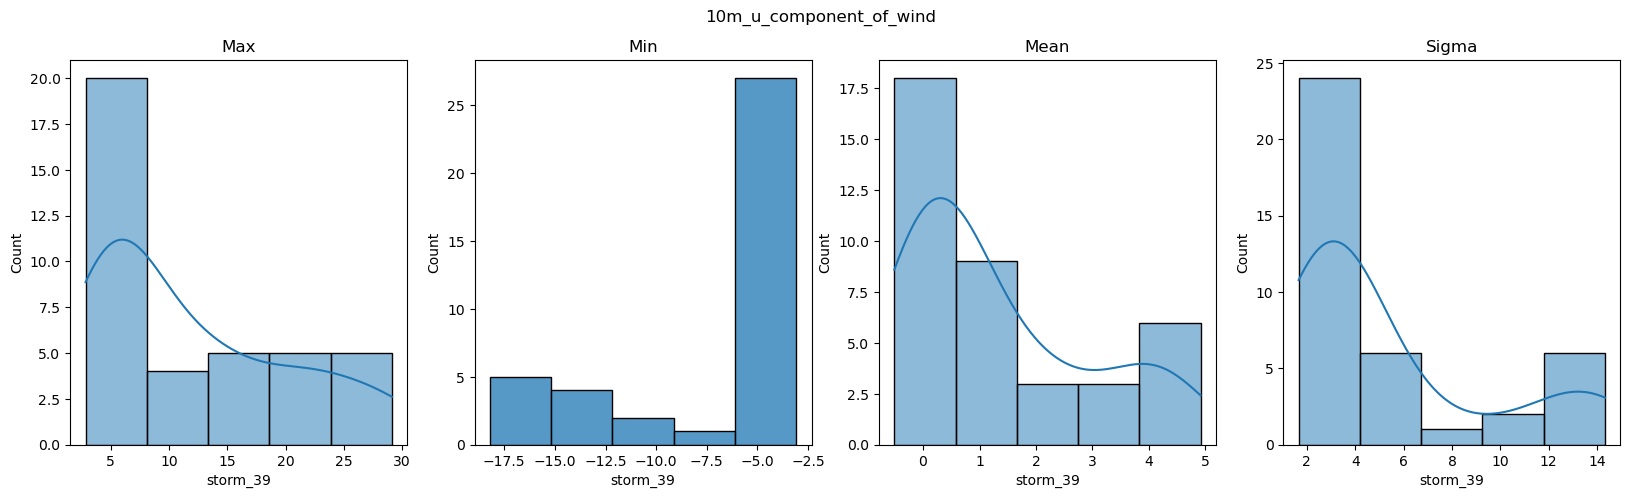

10m_u_component_of_wind


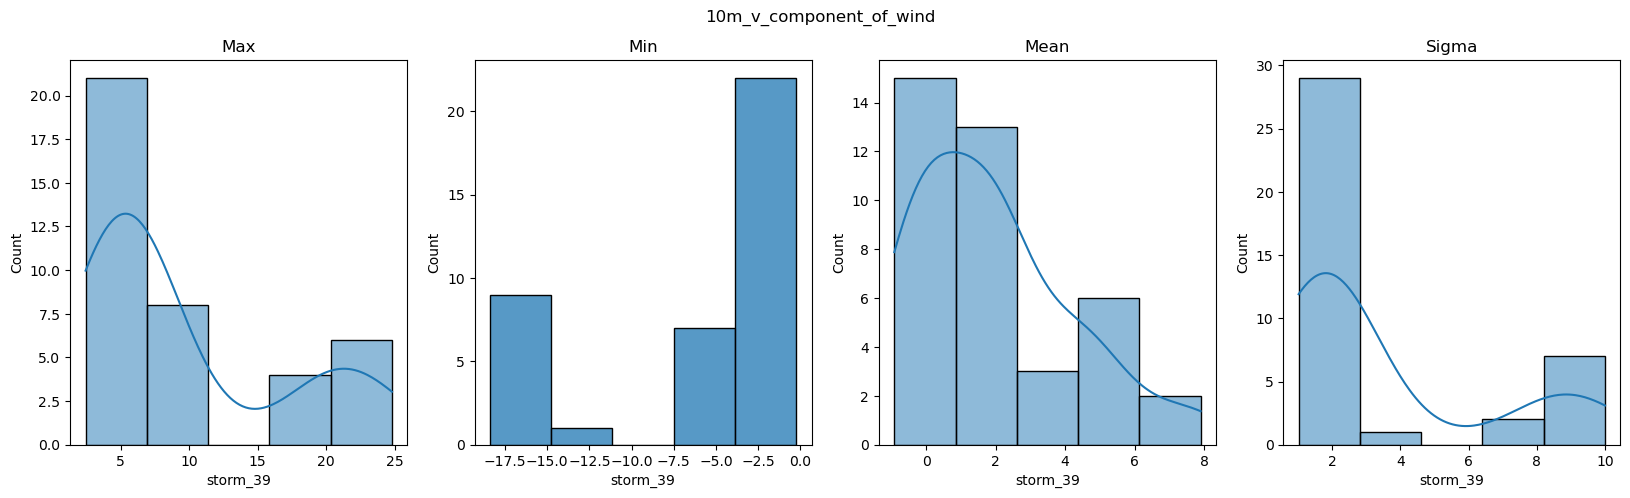

10m_v_component_of_wind


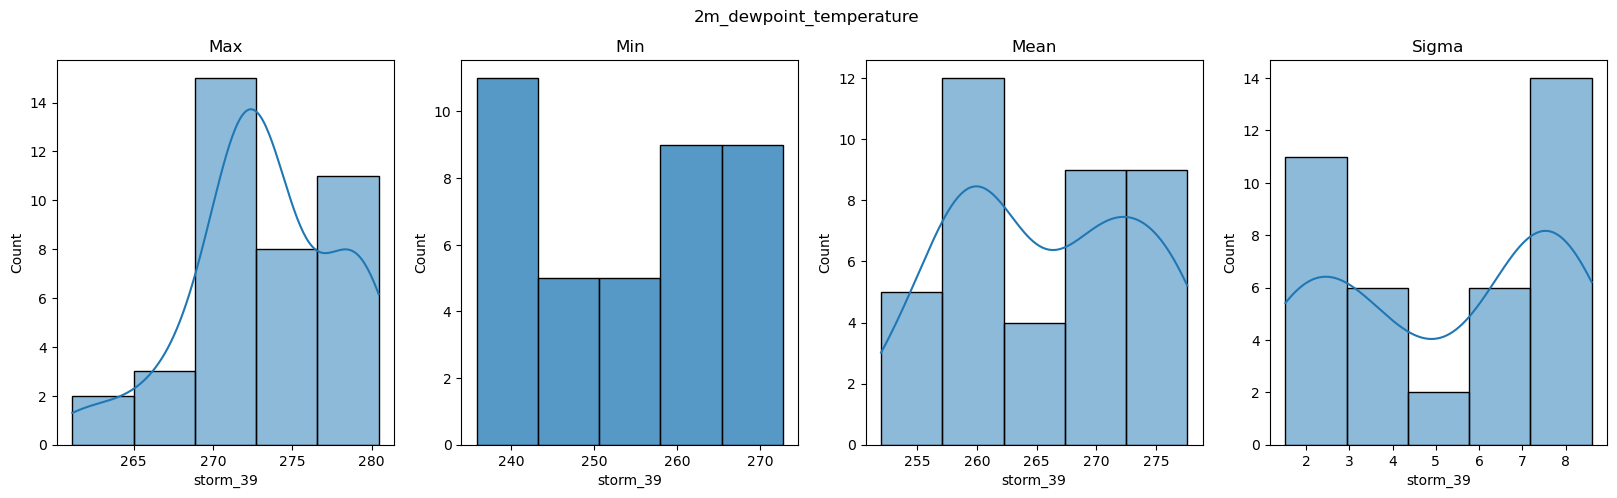

2m_dewpoint_temperature


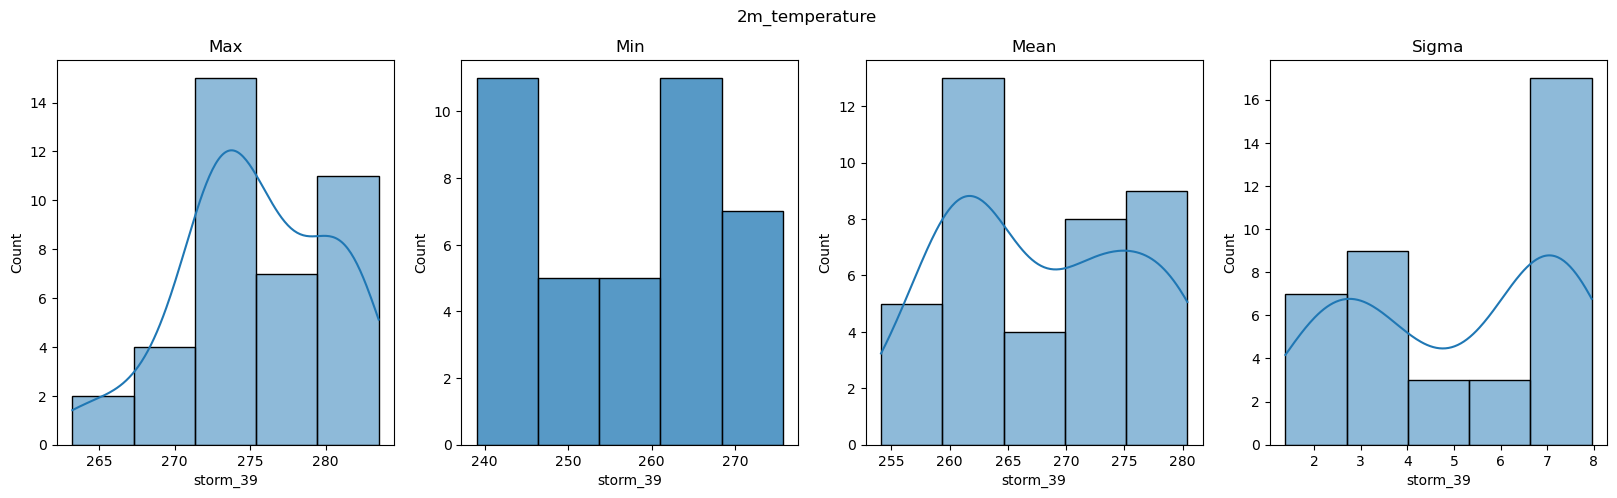

2m_temperature


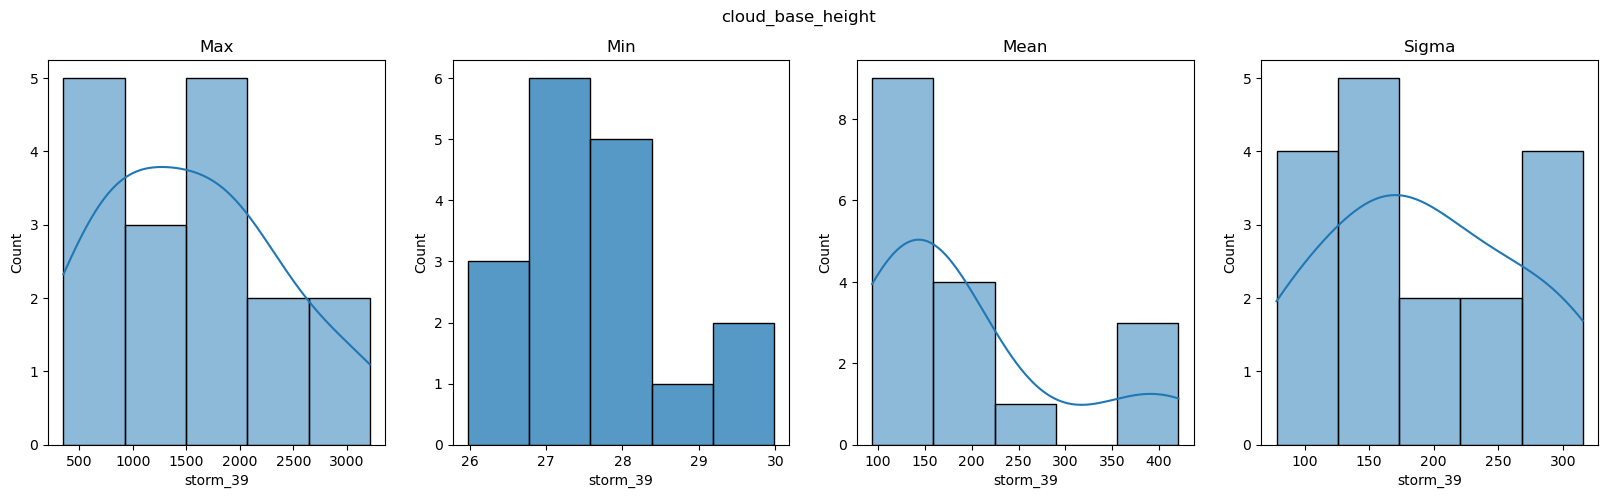

cloud_base_height


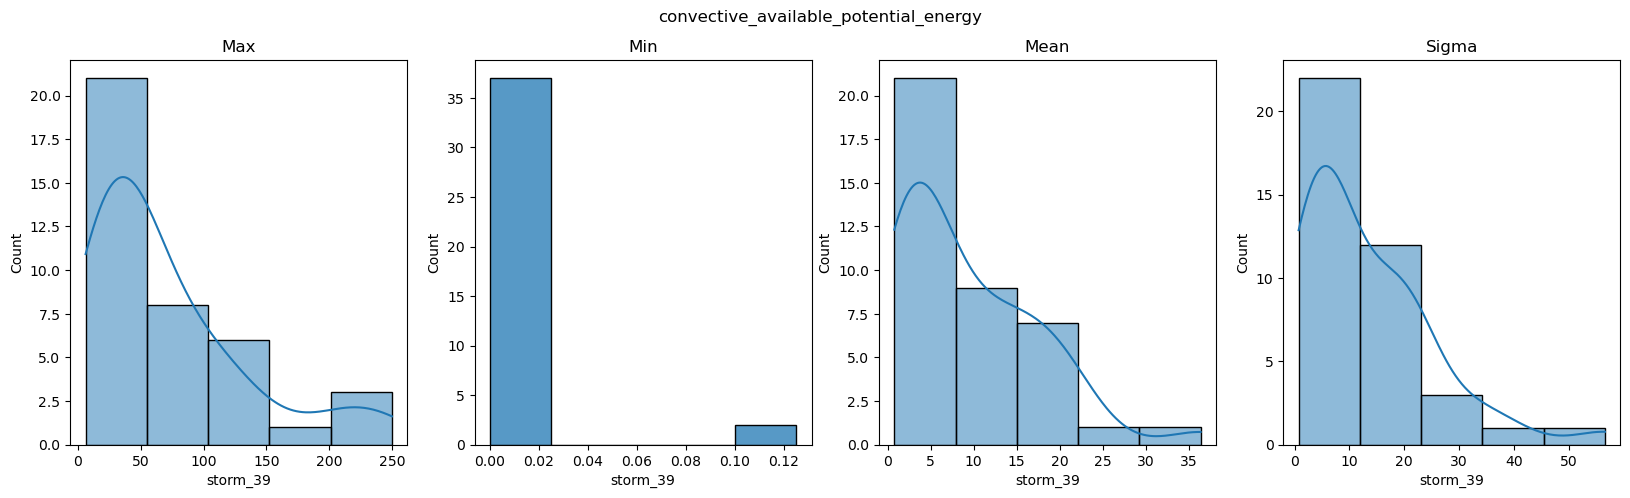

convective_available_potential_energy


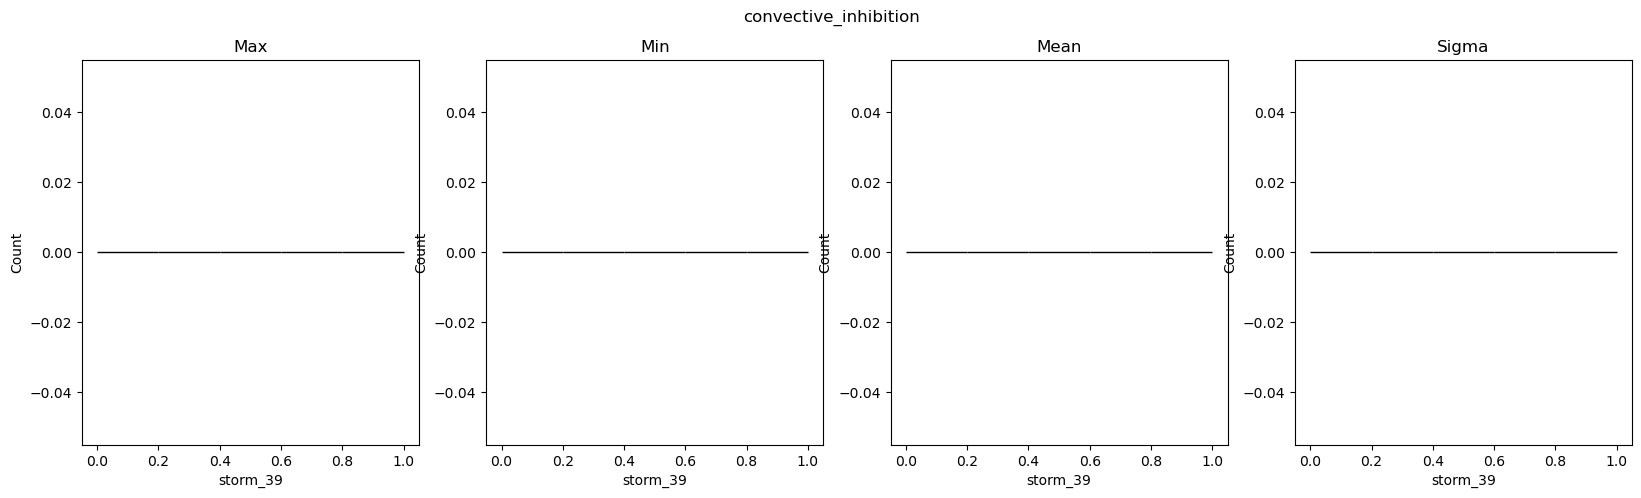

convective_inhibition


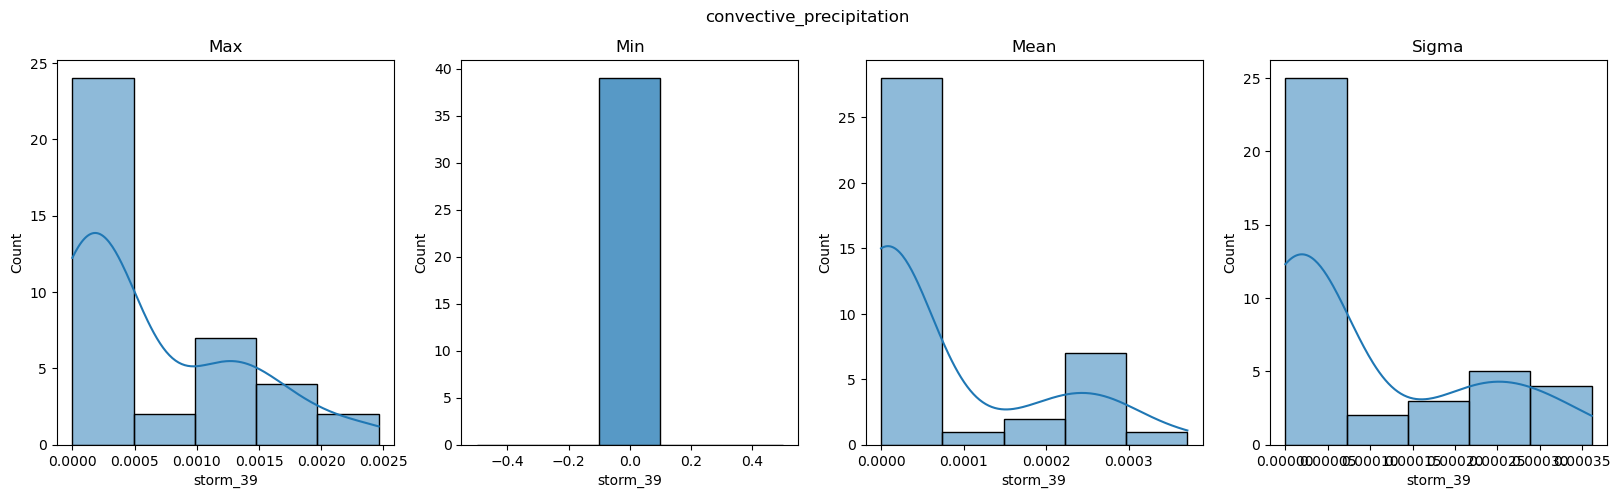

convective_precipitation


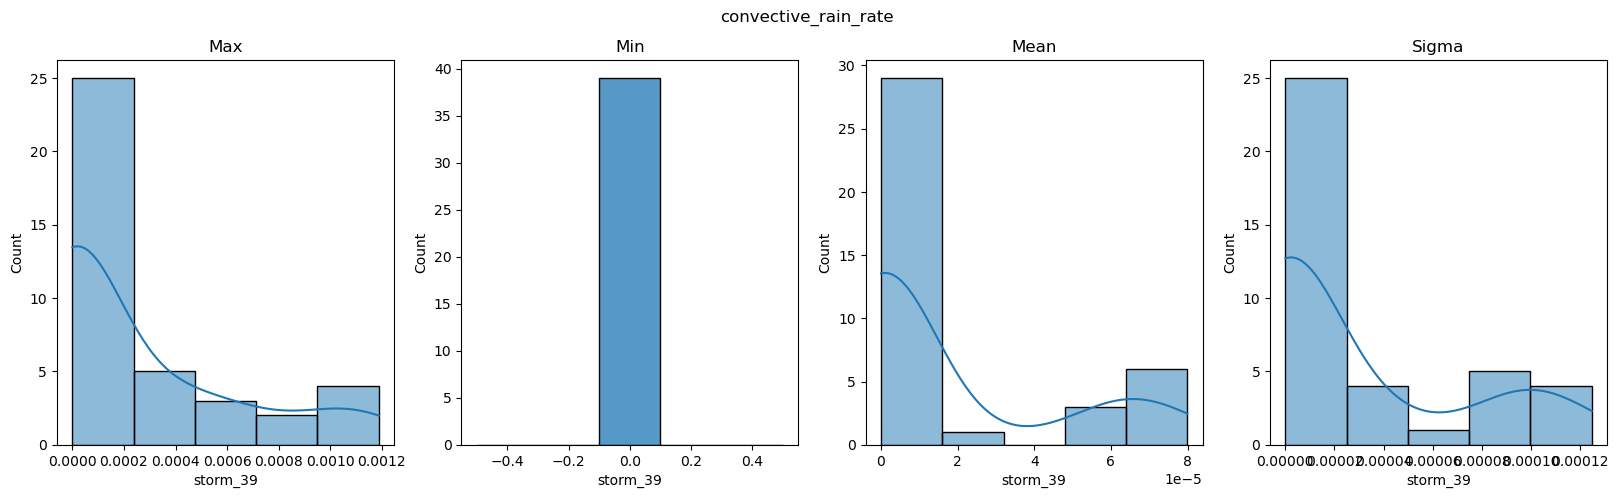

convective_rain_rate


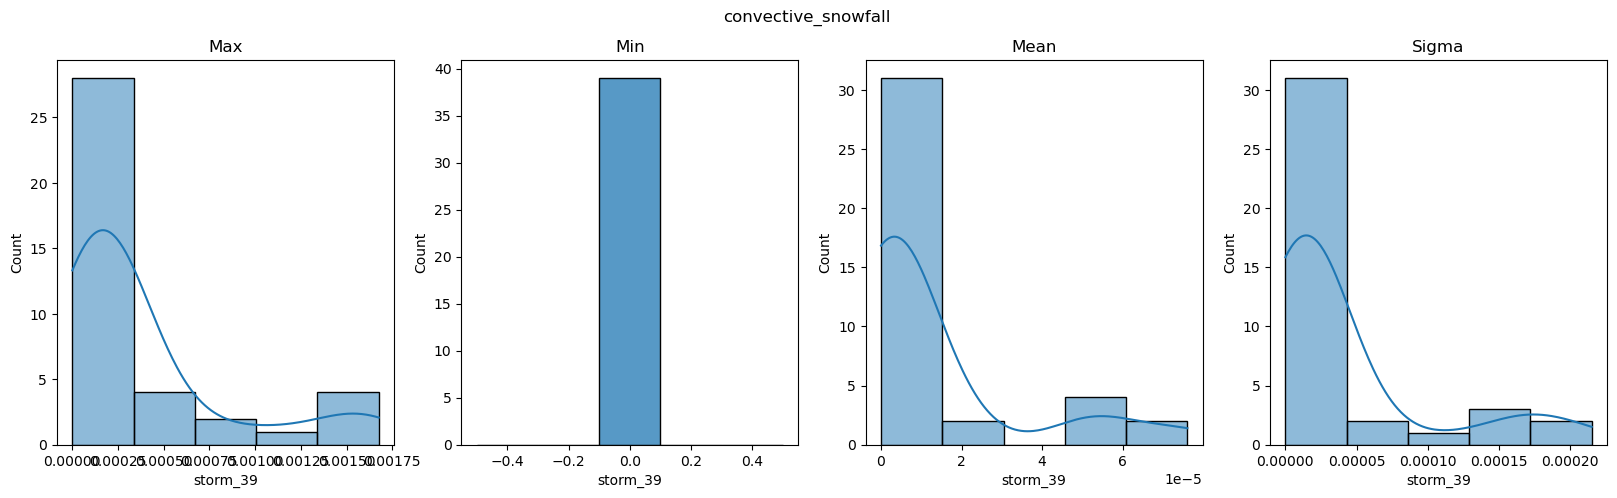

convective_snowfall


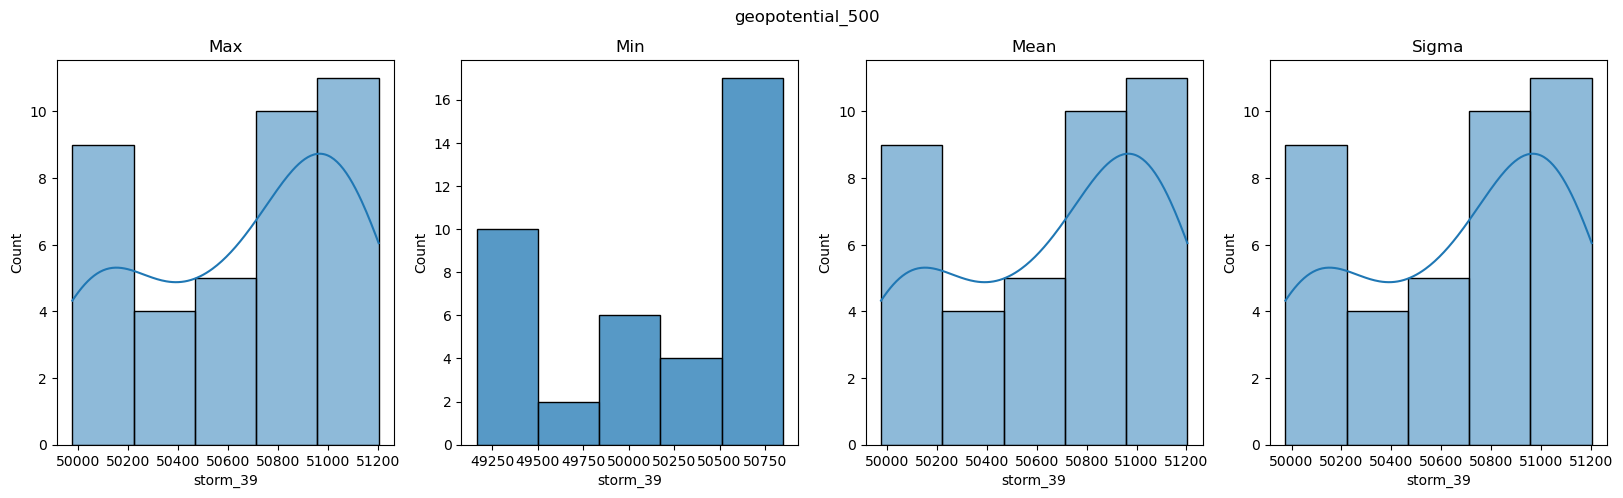

geopotential_500


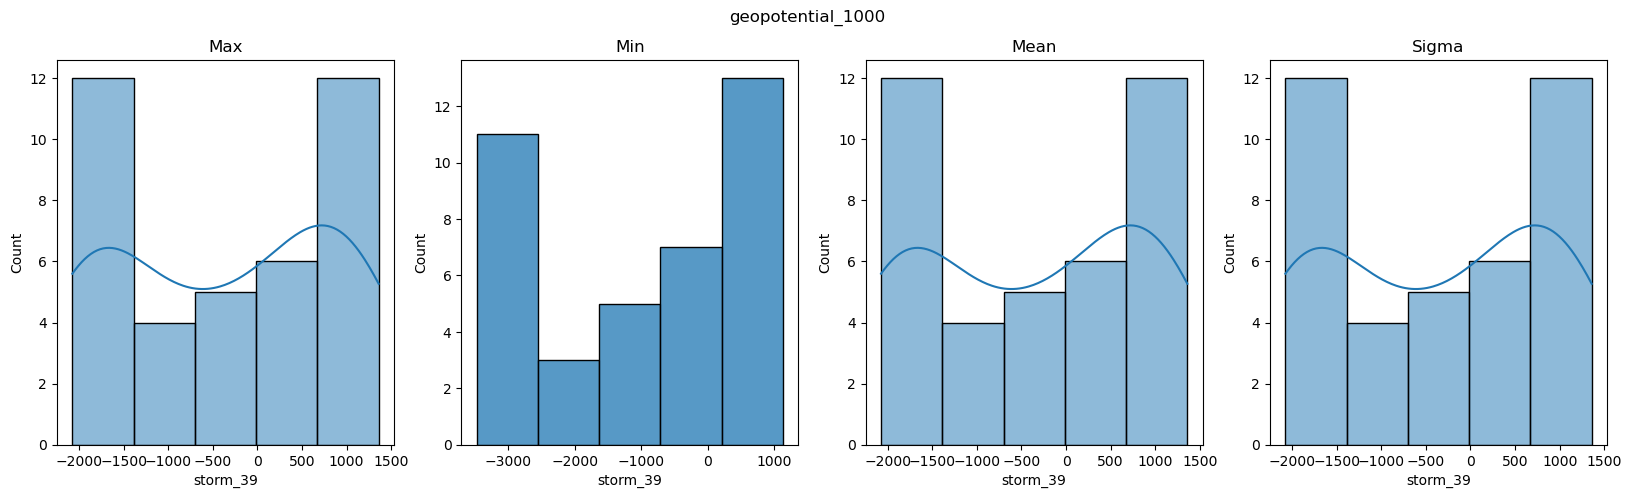

geopotential_1000


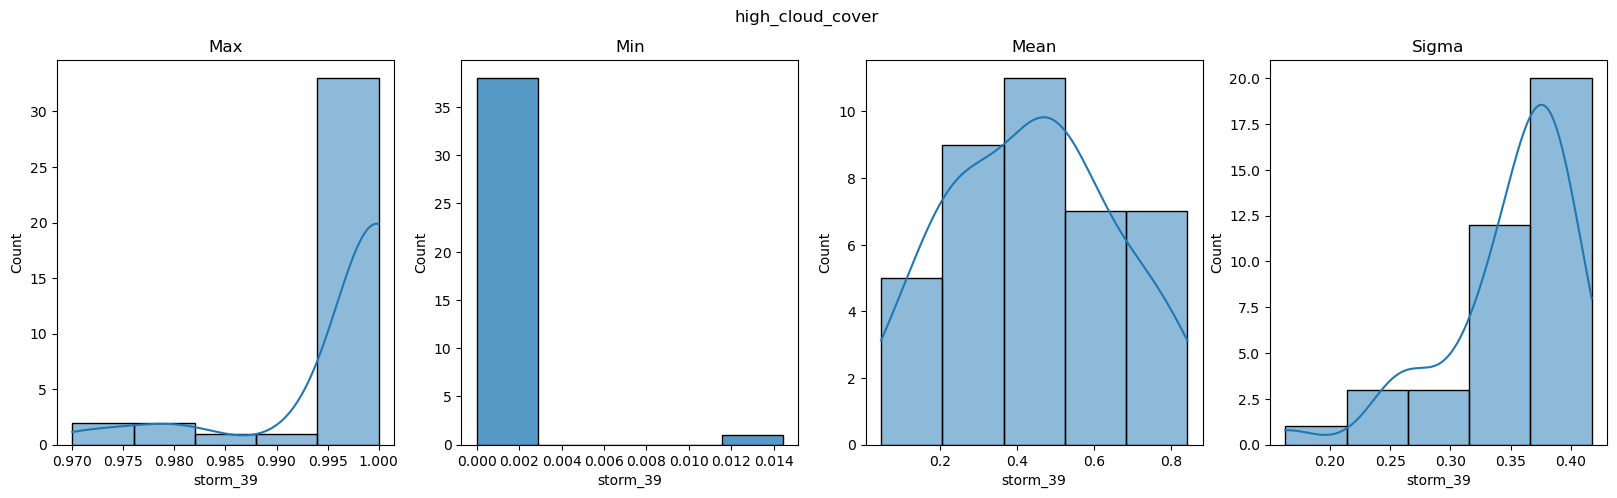

high_cloud_cover


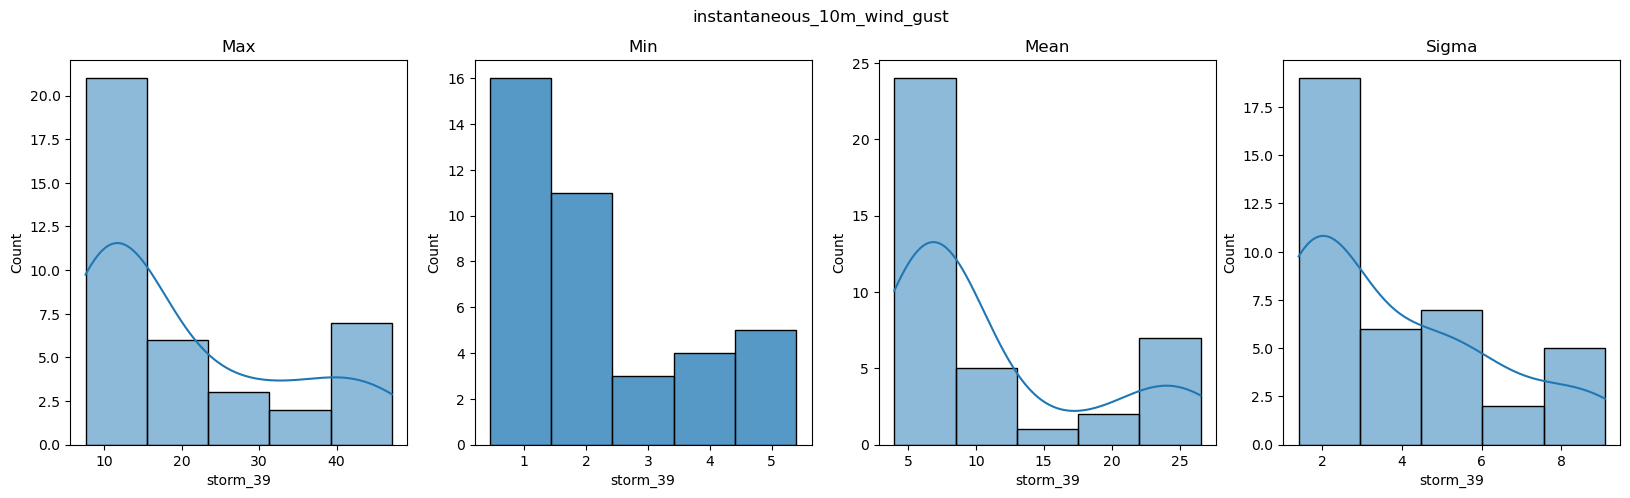

instantaneous_10m_wind_gust


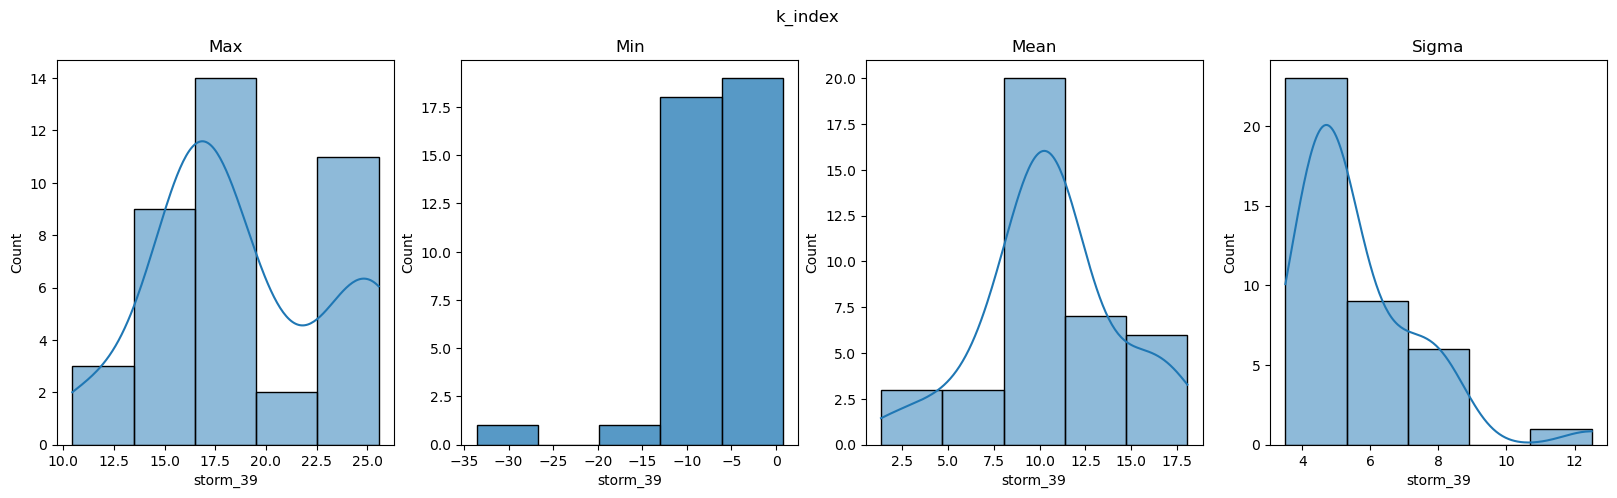

k_index


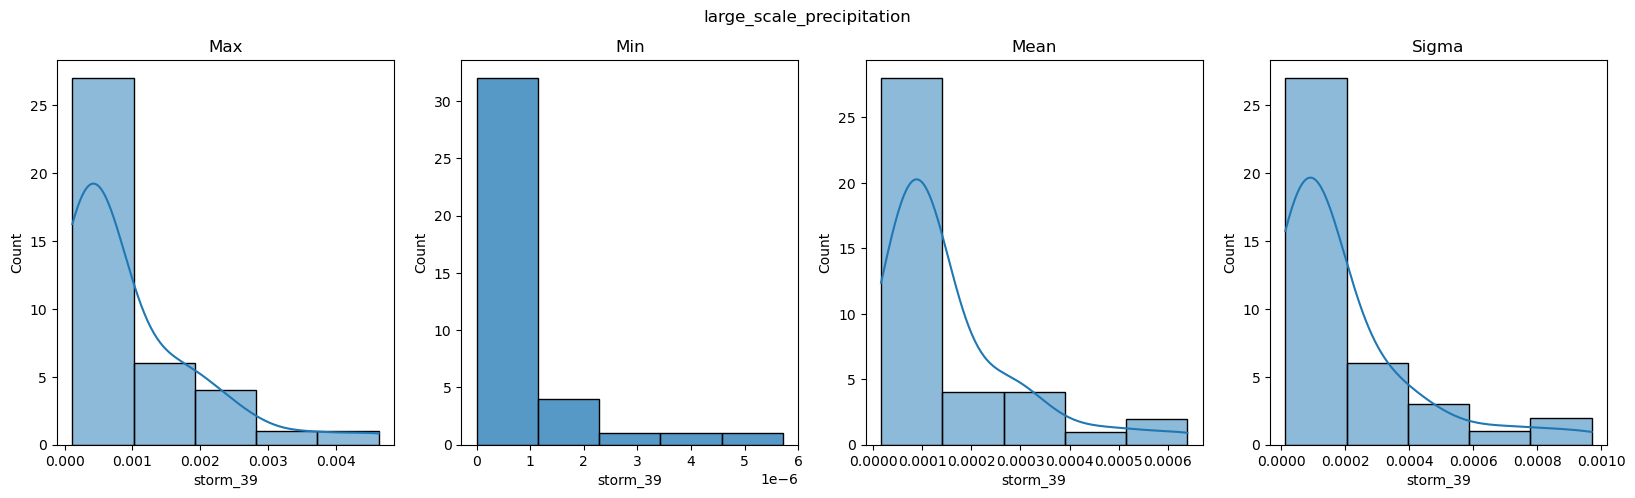

large_scale_precipitation


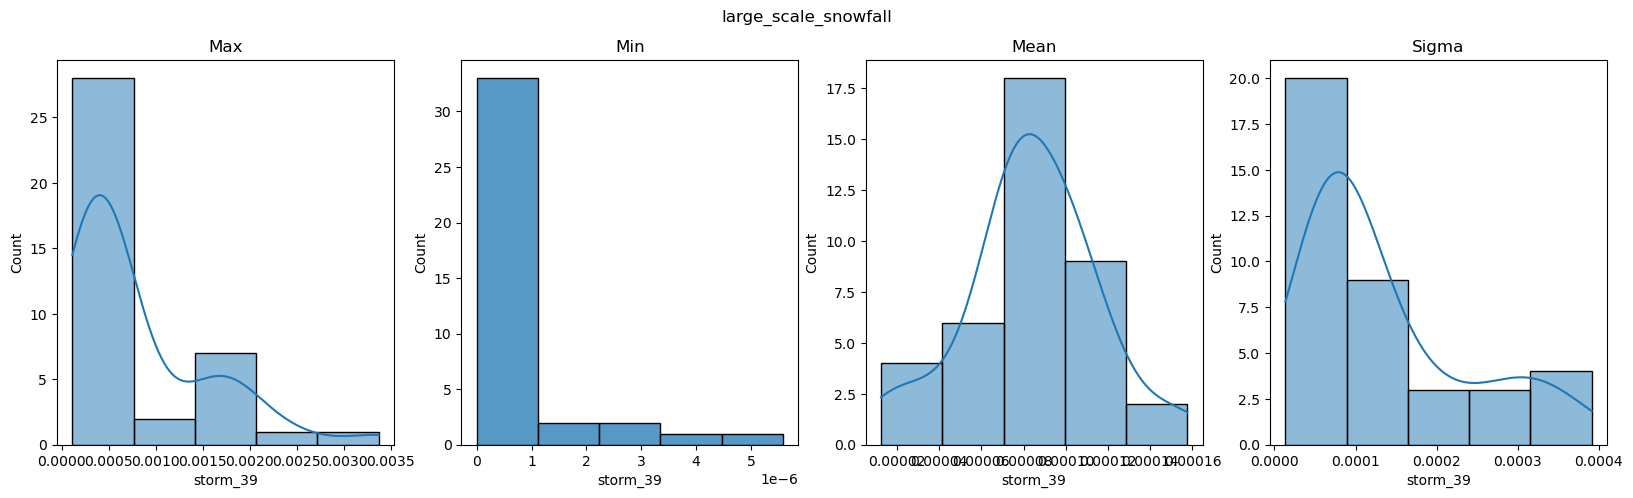

large_scale_snowfall


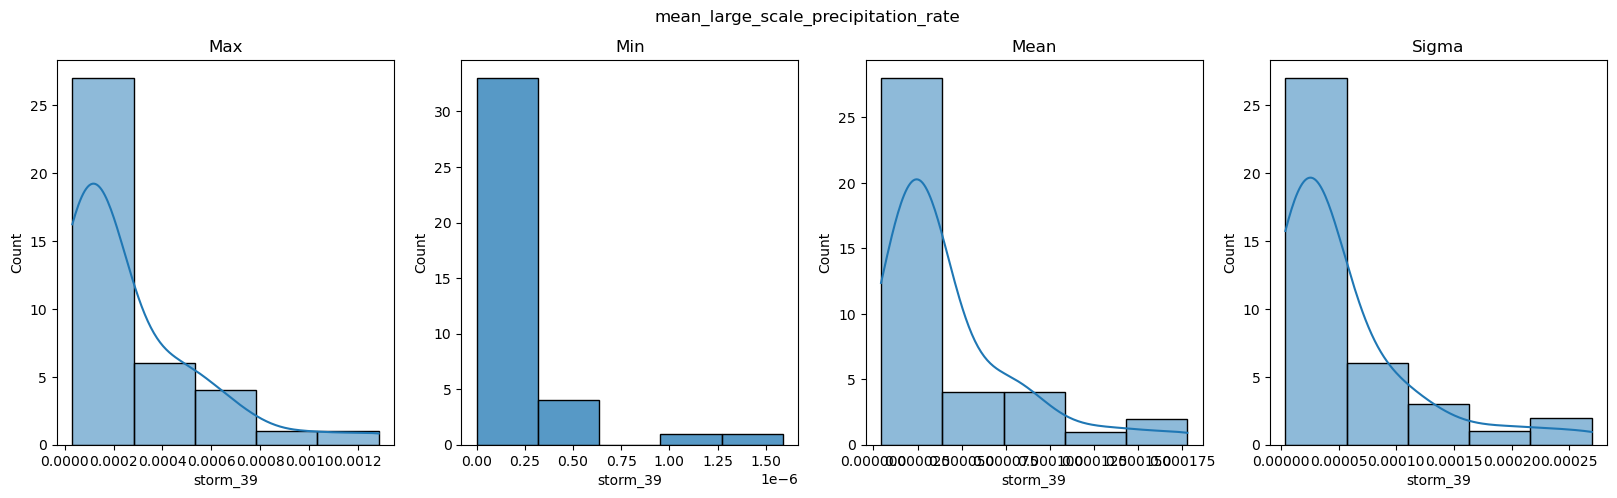

mean_large_scale_precipitation_rate


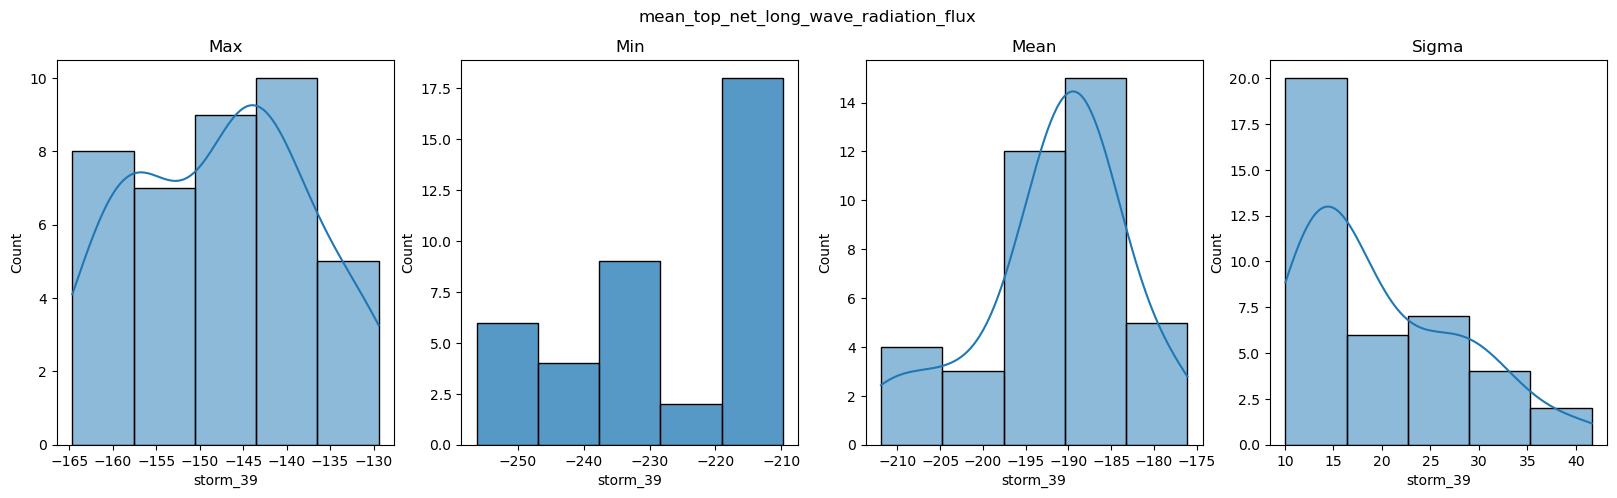

mean_top_net_long_wave_radiation_flux


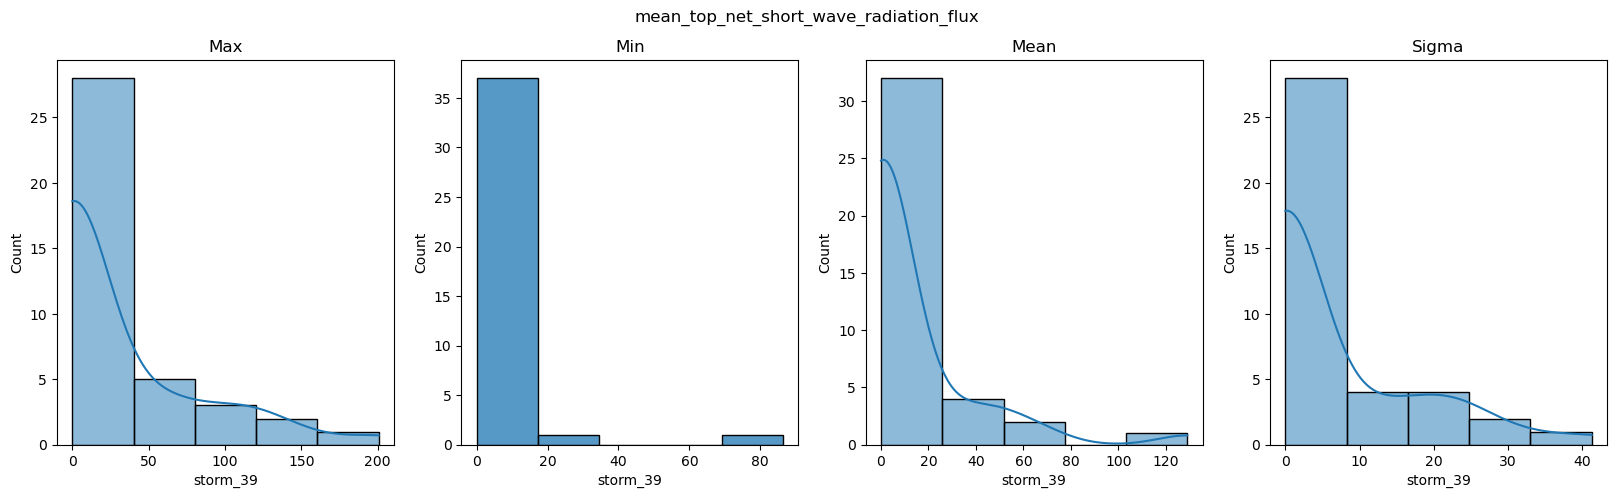

mean_top_net_short_wave_radiation_flux


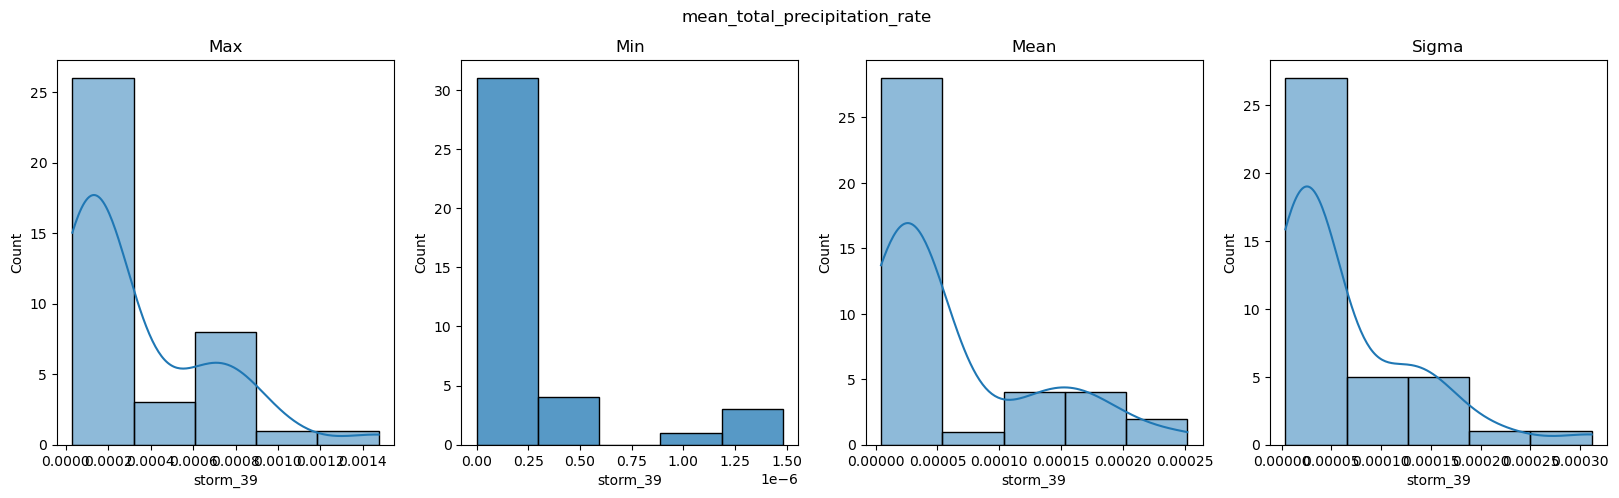

mean_total_precipitation_rate


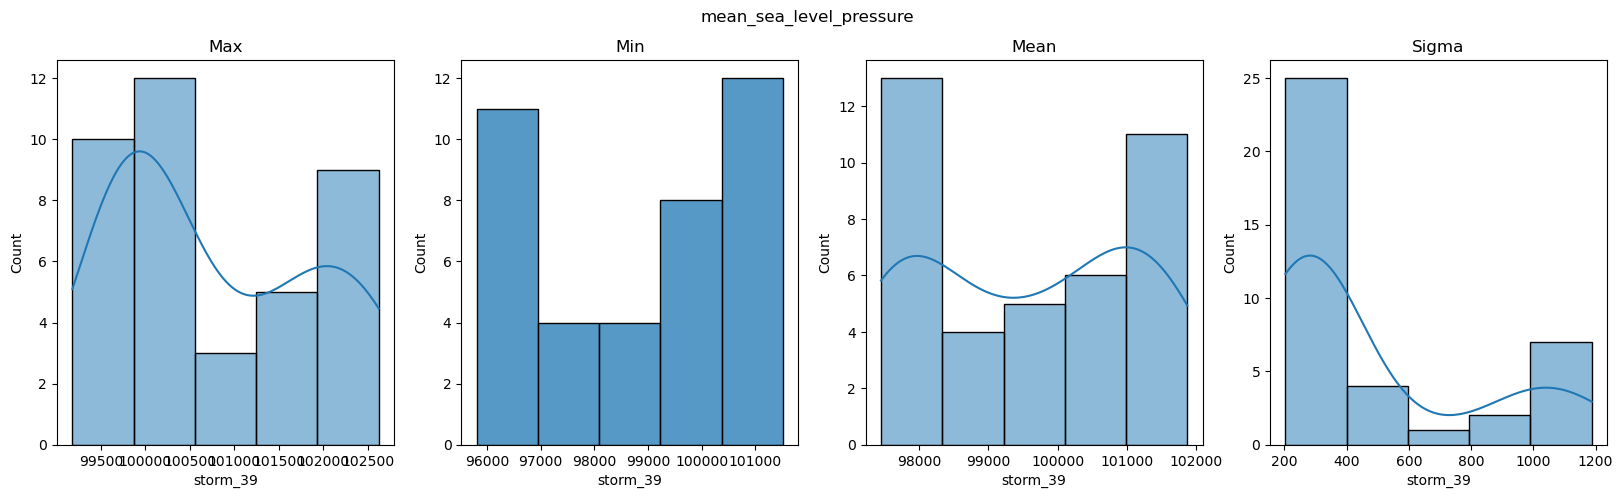

mean_sea_level_pressure


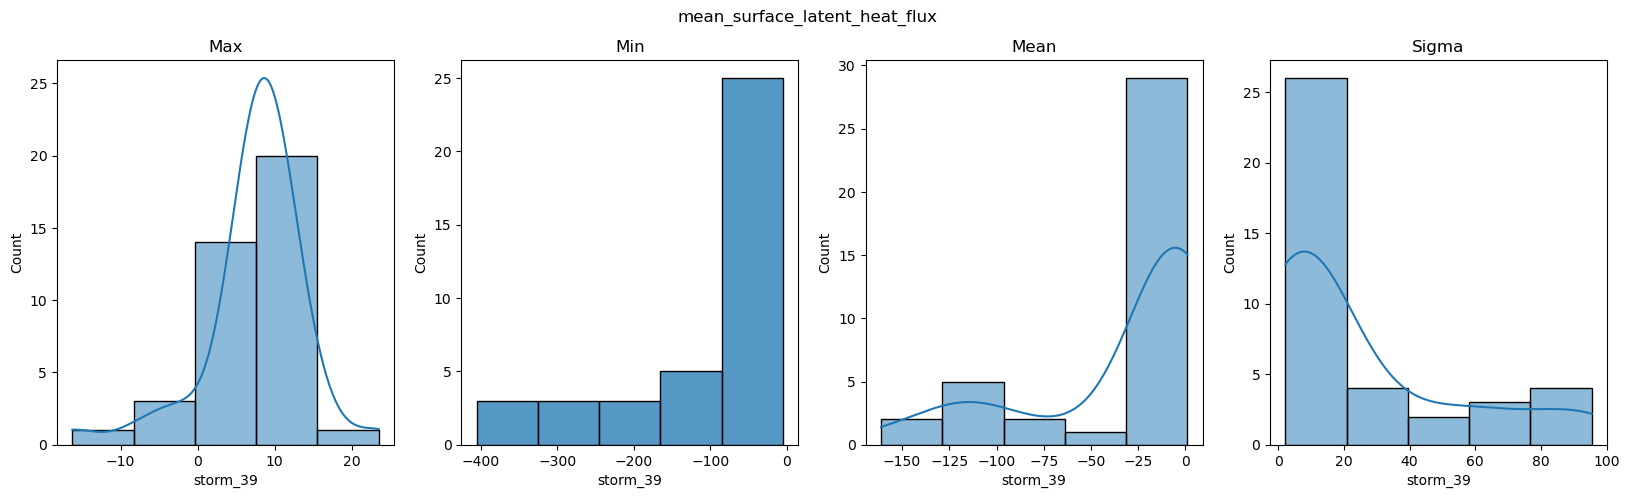

mean_surface_latent_heat_flux


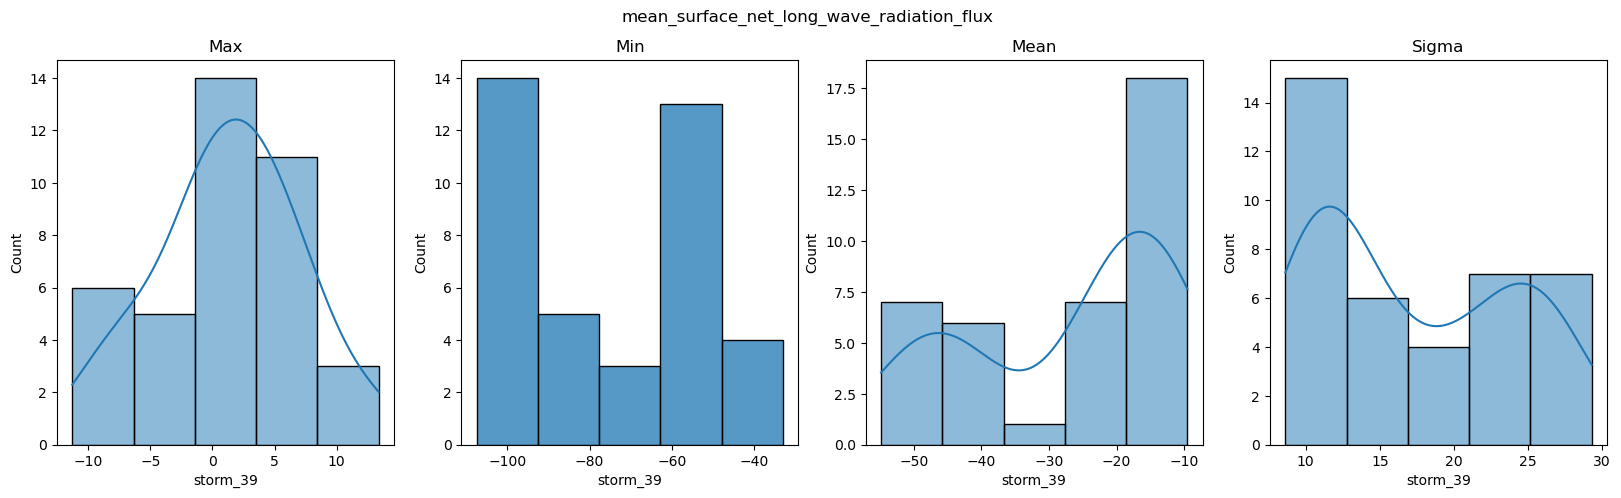

mean_surface_net_long_wave_radiation_flux


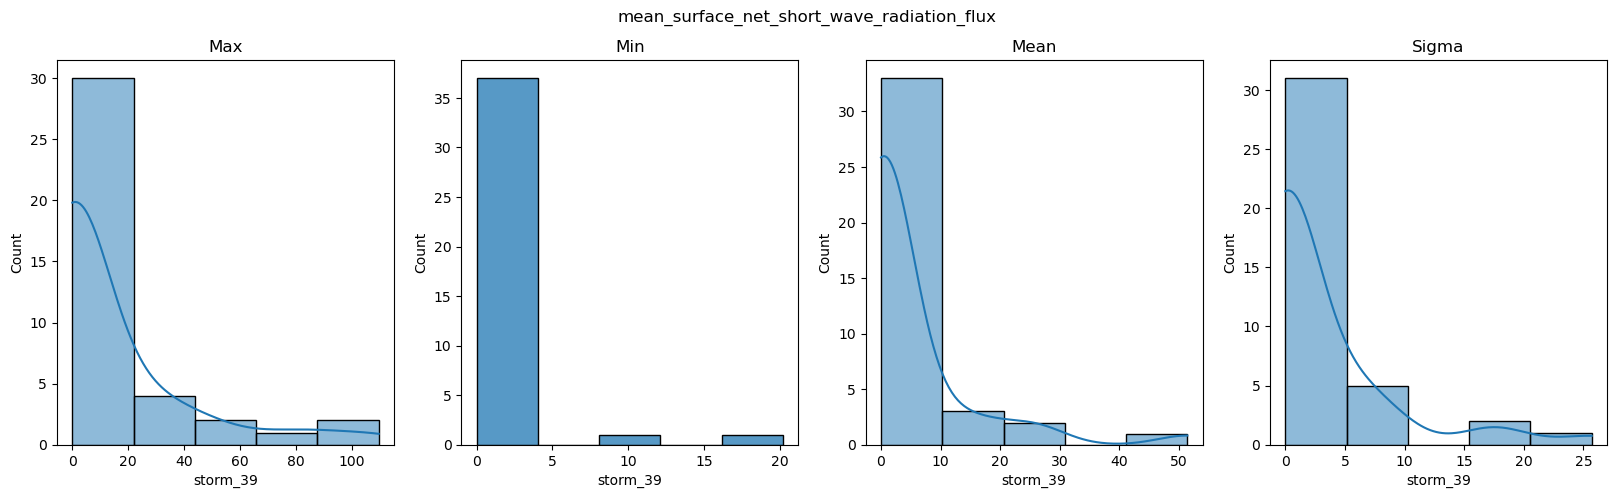

mean_surface_net_short_wave_radiation_flux


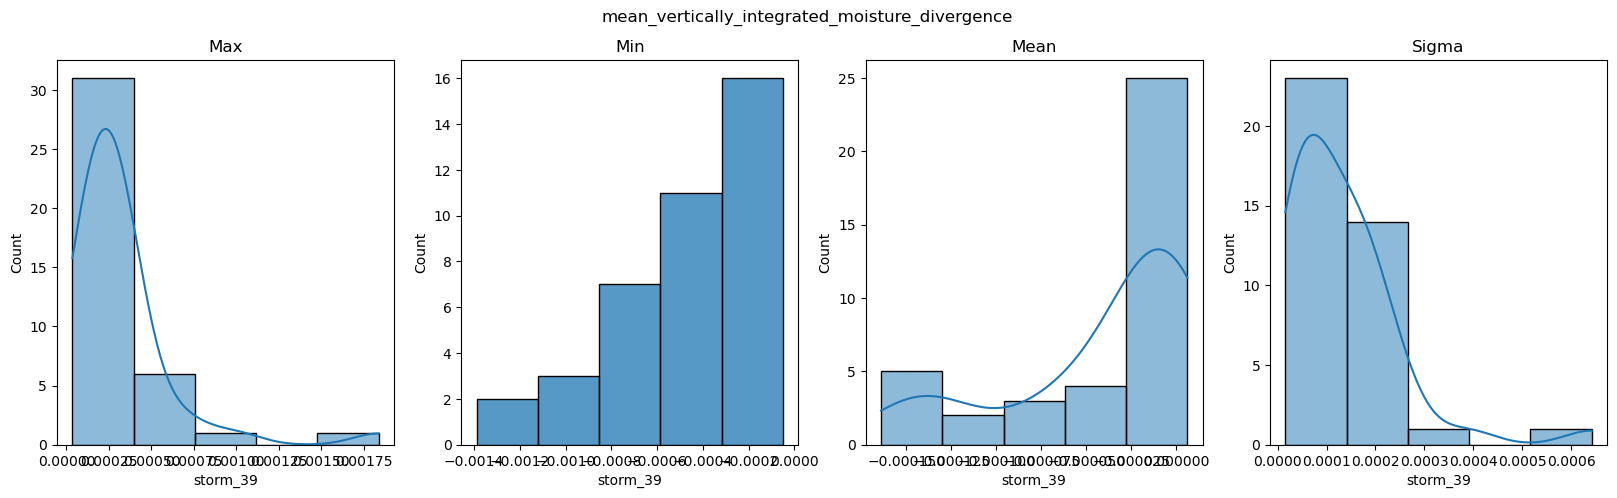

mean_vertically_integrated_moisture_divergence


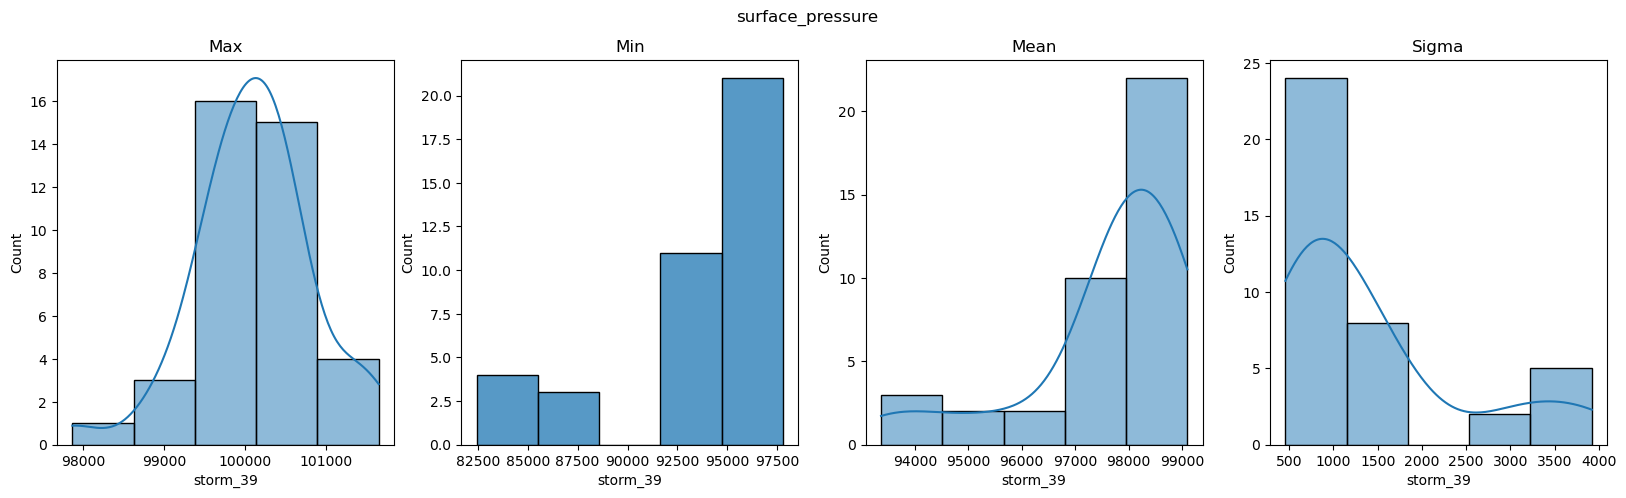

surface_pressure


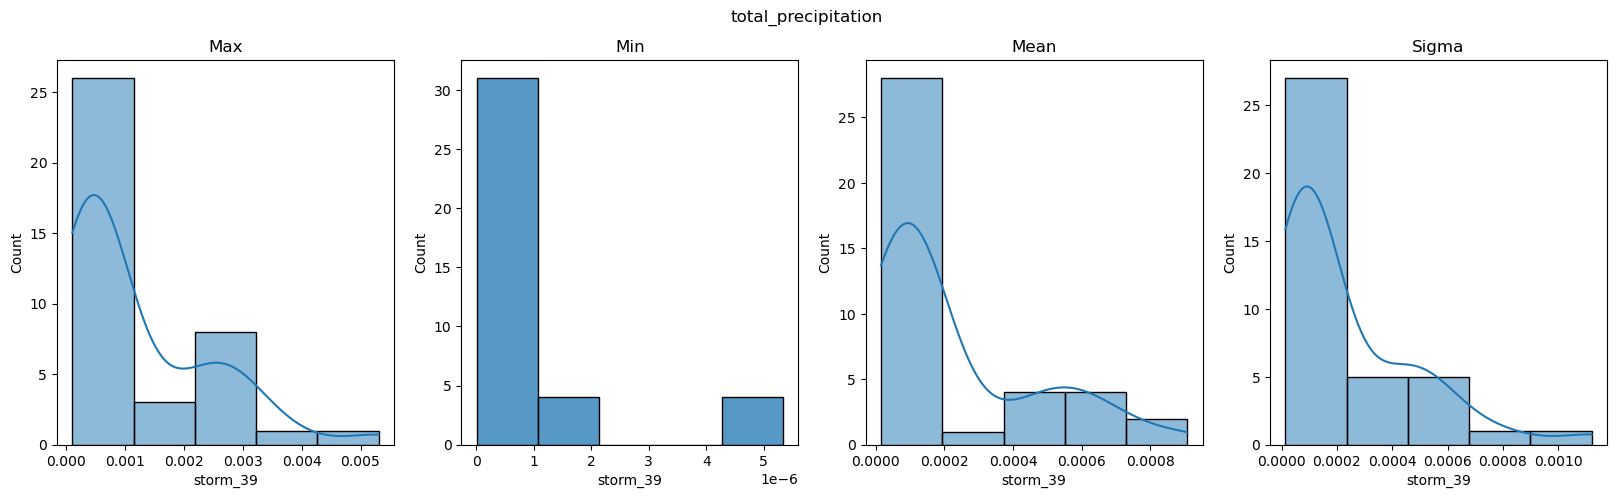

total_precipitation


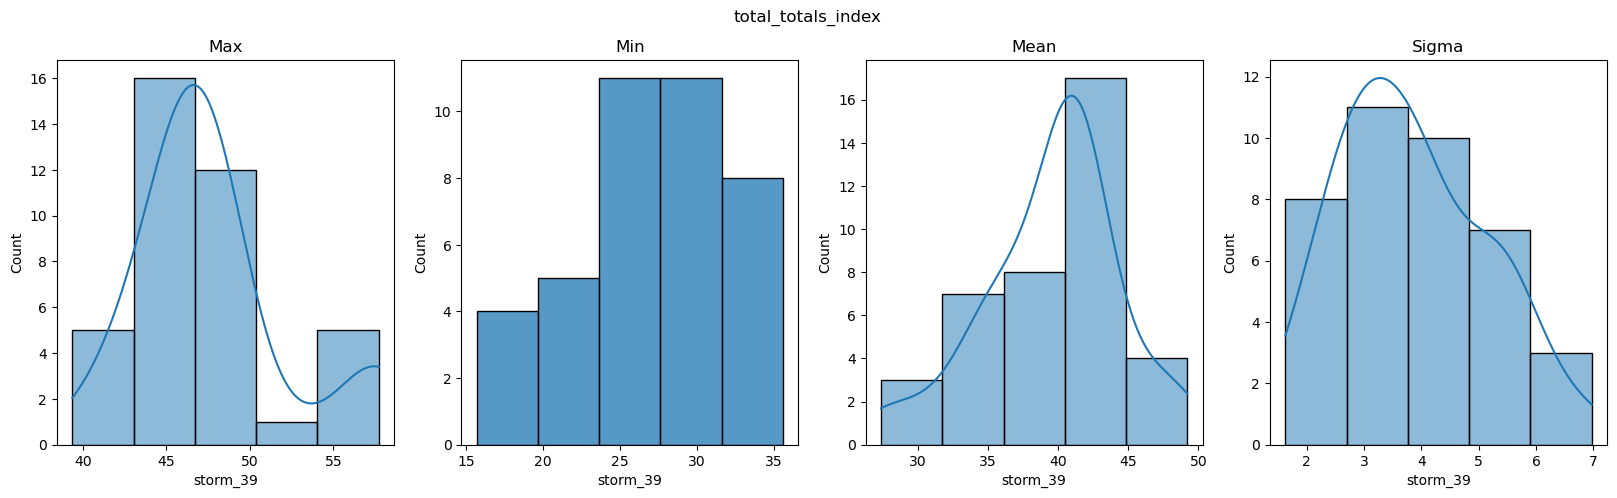

total_totals_index


In [37]:
# plot the normality of the data
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Ignorer les avertissements FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning)
storm_number = 'storm_39' # 38 Lothar storm
bin_number = 5

# Votre code ici

for i in range(0, len(name_of_variables)):
    var_name = name_of_variables.iloc[i]
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    
    if f'max_{var_name}' in locals() and locals()[f'max_{var_name}'] is not None:
        sns.histplot(locals()[f'max_{var_name}'][storm_number], kde=True, ax=ax[0], bins=bin_number) #[storm_number]
    ax[0].set_title('Max')
    
    if f'min_{var_name}' in locals() and locals()[f'min_{var_name}'] is not None:
        sns.histplot(locals()[f'min_{var_name}'][storm_number], kde=False, ax=ax[1], bins=bin_number) #[storm_number]
    ax[1].set_title('Min')
    
    if f'mean_{var_name}' in locals() and locals()[f'mean_{var_name}'] is not None:
        sns.histplot(locals()[f'mean_{var_name}'][storm_number], kde=True, ax=ax[2], bins=bin_number) # [storm_number]
    ax[2].set_title('Mean')
    
    if f'sigma_{var_name}' in locals() and locals()[f'sigma_{var_name}'] is not None:
        sns.histplot(locals()[f'sigma_{var_name}'][storm_number], kde=True, ax=ax[3], bins=bin_number) #[storm_number]
    ax[3].set_title('Sigma')
    
    plt.suptitle(var_name)
    plt.show()
    print(var_name)

In [18]:
# create a heatmap correlation matrix with all the variables but per statistic
storm_number = 38
correlation_matrices = {}
for stat in ['max', 'min', 'mean', 'sigma']:
    df = pd.DataFrame()
    for var in name_of_variables:
        if f'{stat}_{var}' in locals() :#and locals()[f'{stat}_{var_name}'] is not None:
            temp_df = locals()[f'{stat}_{var}'][f'storm_{storm_number}']#.reset_index(drop=True) #storm_number
            temp_df = temp_df.to_frame(var) # add the name of variables in the column
            df = pd.concat([df, temp_df], axis=1)
        else:
            print(f'{stat}_{var_name} not in locals')
    df = df.dropna(how='all')
    corr = abs(df.corr(min_periods=3))
    # store the name of the variables in the column
    #correlation_matrices[stat].columns = df.columns
    correlation_matrices[stat] = corr  # store the correlation matrix
    #store the correlation matrix in a csv file
    corr.to_csv(path + 'case_study/' + f'correlation_matrix_{stat}.csv')
    '''plt.figure(figsize=(20, 20))
    sns.heatmap(corr, annot=True, cmap='Reds', fmt=".2f")
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.title(f'Correlation matrix for {stat}')
    # save figure
    #plt.savefig(f'/Users/fabienaugsburger/Documents/GitHub/master-project/case_study/correlation_matrix_{stat}.png', dpi=500, bbox_inches='tight')
    plt.show()'''

Text(0.5, 1.0, 'Correlation matrix for all variables')

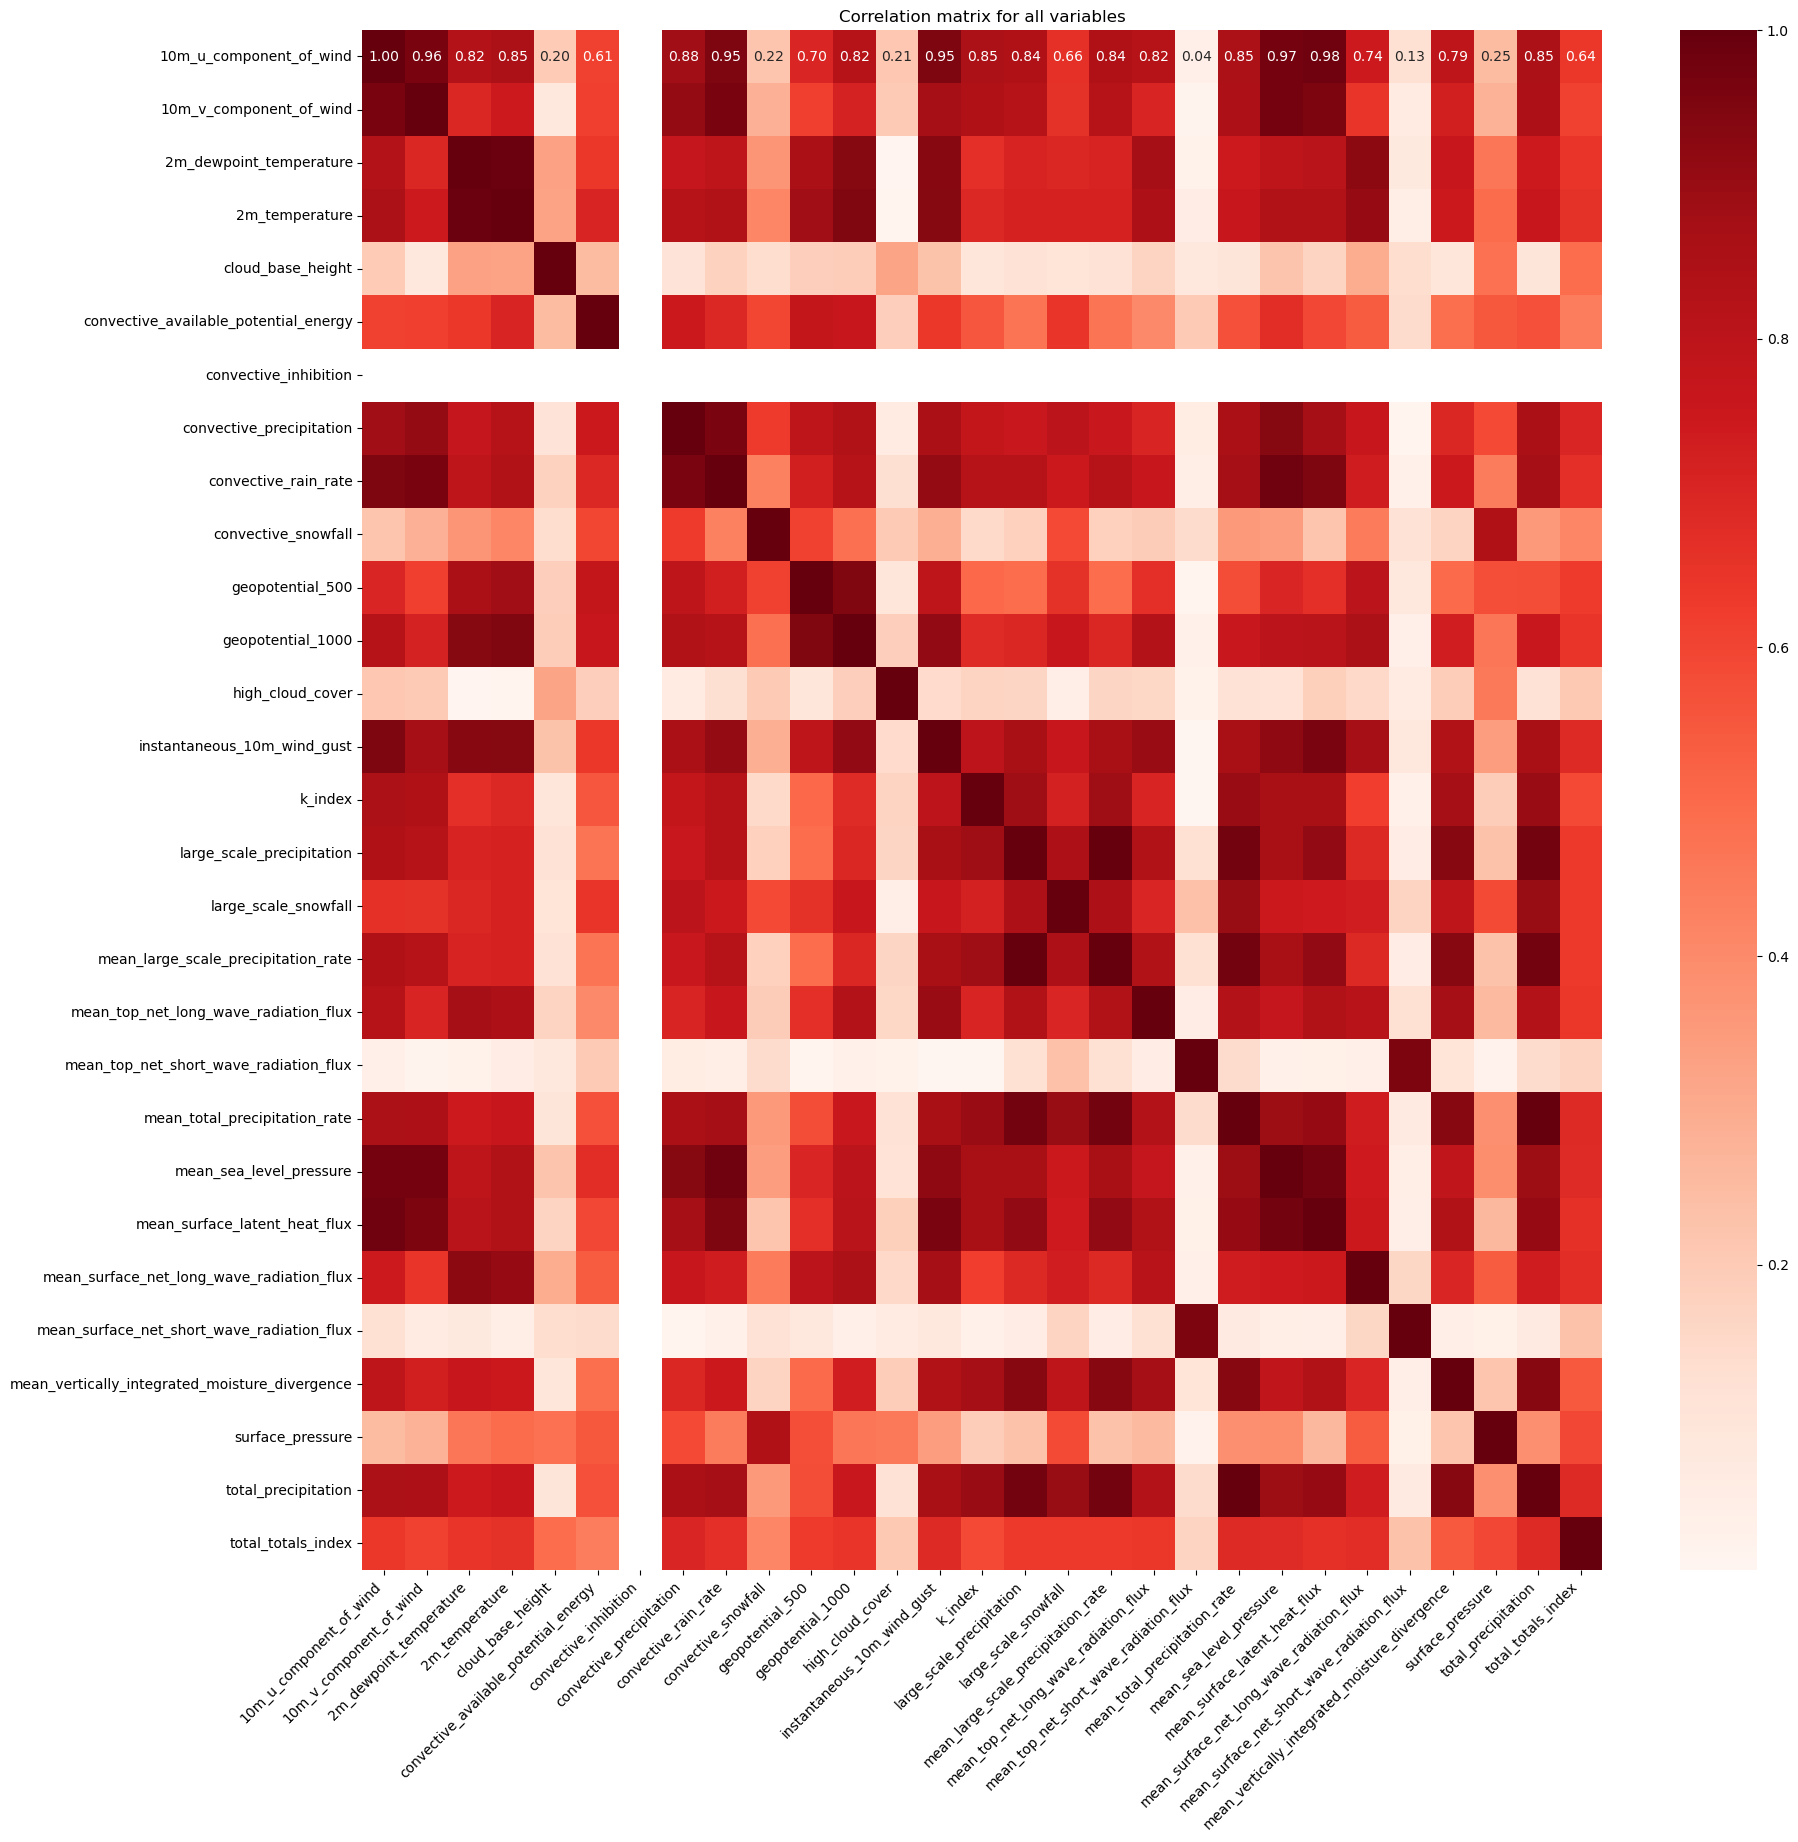

In [75]:
df = pd.DataFrame()
for i in range(0, len(name_of_variables)):
        var_name = name_of_variables.iloc[i]
        if f'{stat}_{var_name}' in locals() :#and locals()[f'{stat}_{var_name}'] is not None:
            temp_df = locals()[f'{stat}_{var_name}'][storm_number]#.reset_index(drop=True) #storm_number
            temp_df = temp_df.to_frame(var_name) # add the name of variables in the column
            df = pd.concat([df, temp_df], axis=1)
        else:
            print(f'{stat}_{var_name} not in locals')
# remove the row that have nan values in each column
df = df.dropna(how='all')

# create a heatmap correlation matrix with all the variables but per statistic
corr = abs(df.corr(min_periods=10))
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='Reds', fmt=".2f")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title(f'Correlation matrix for all variables')

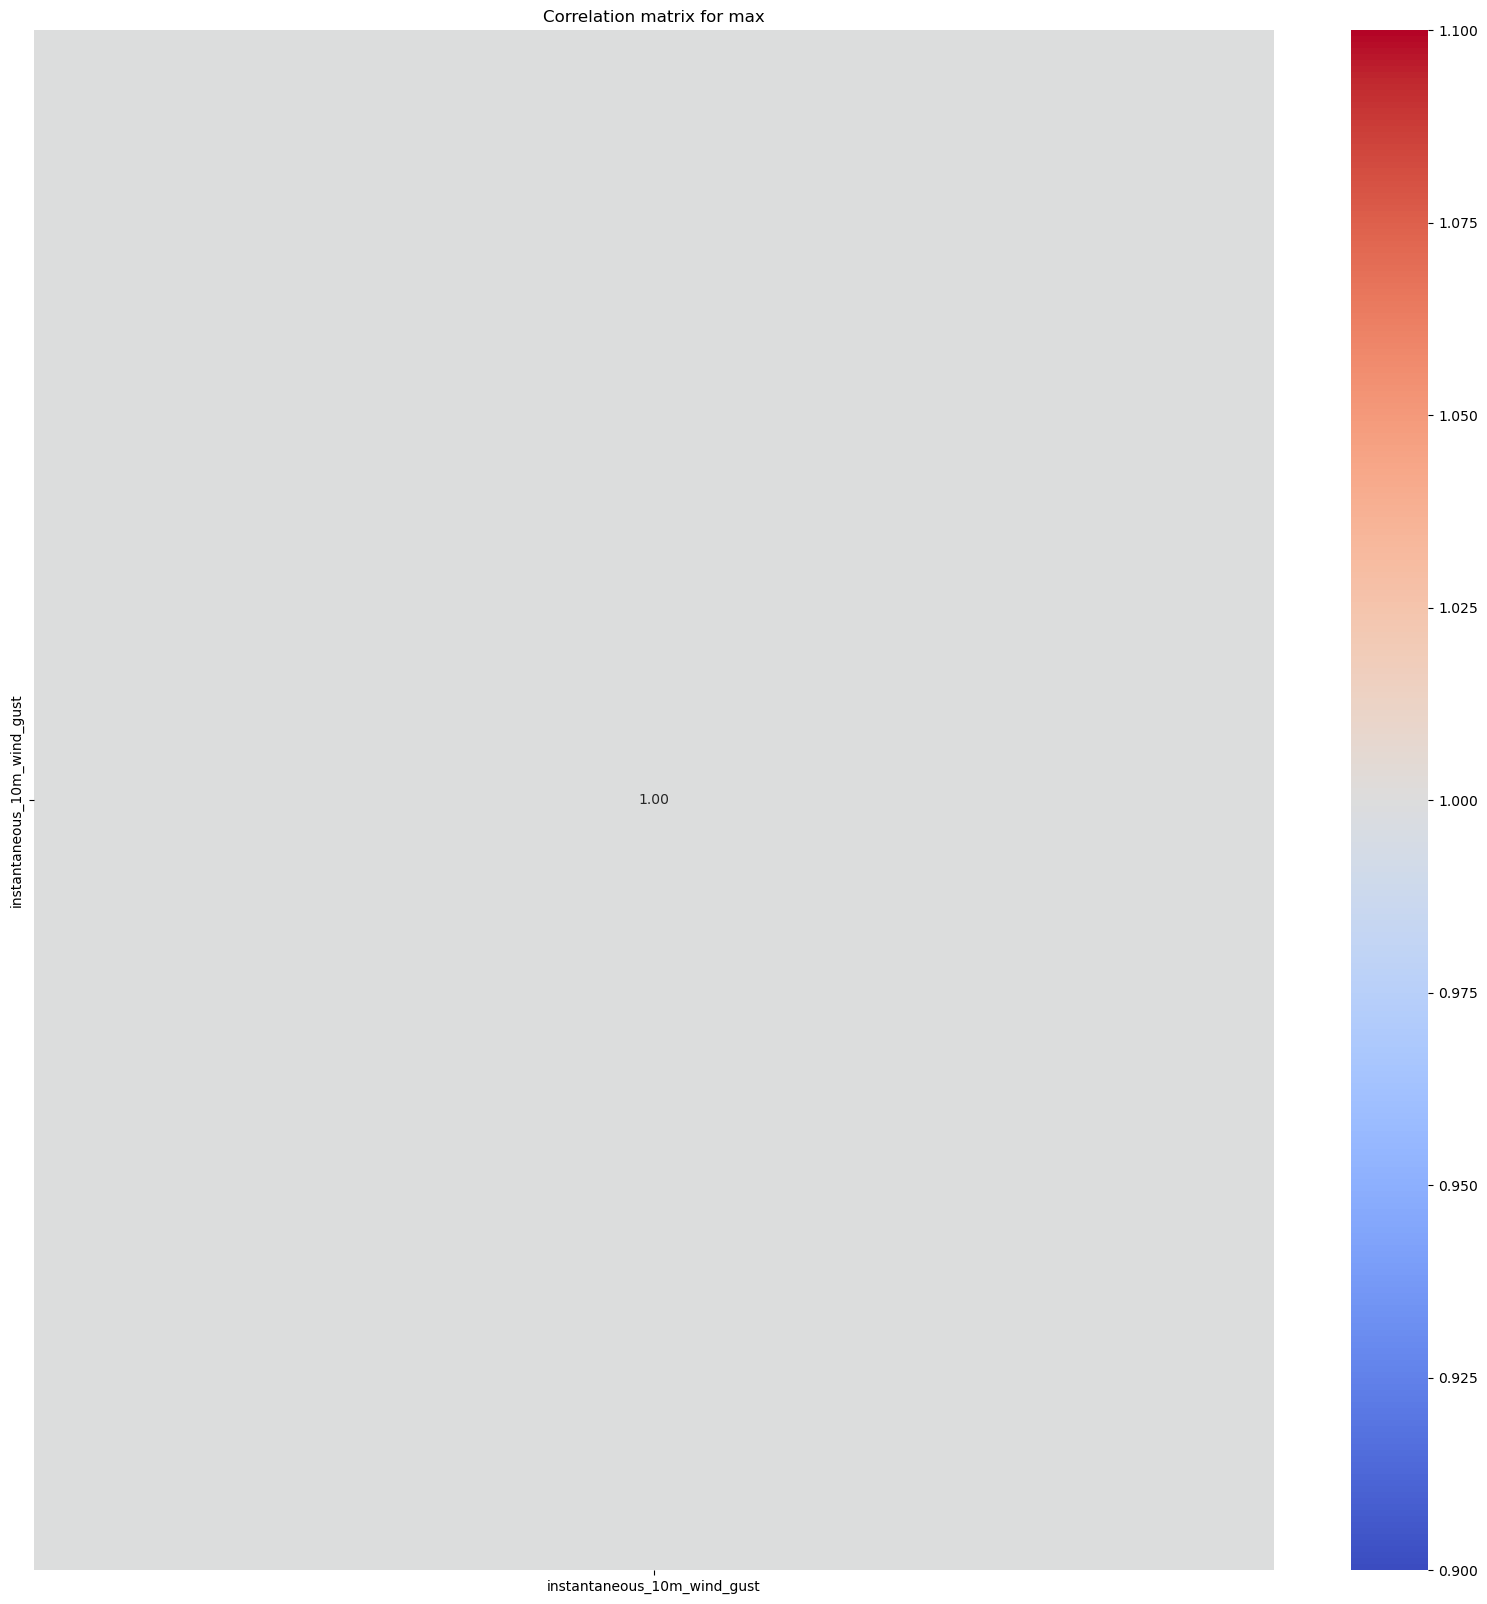

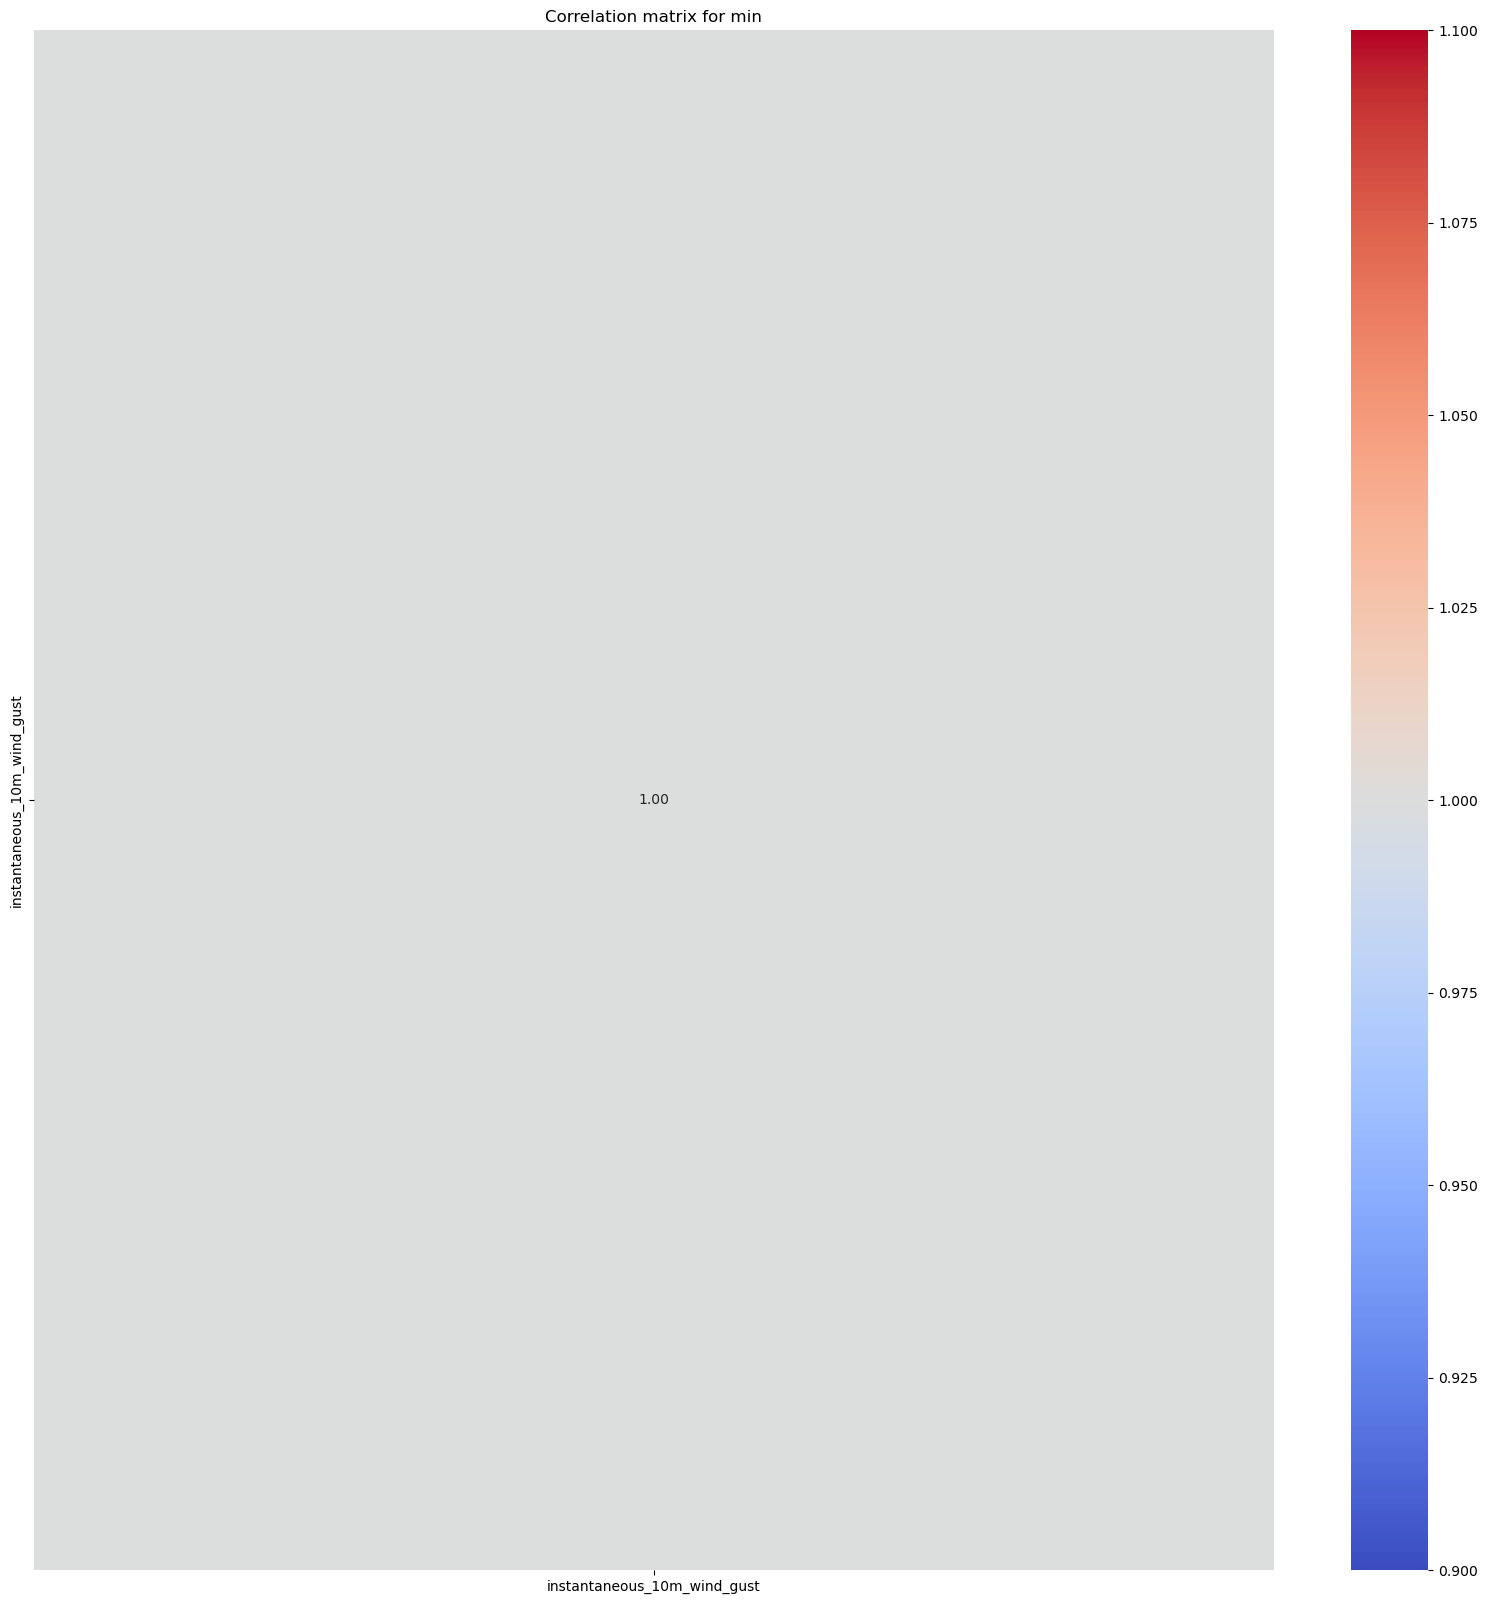

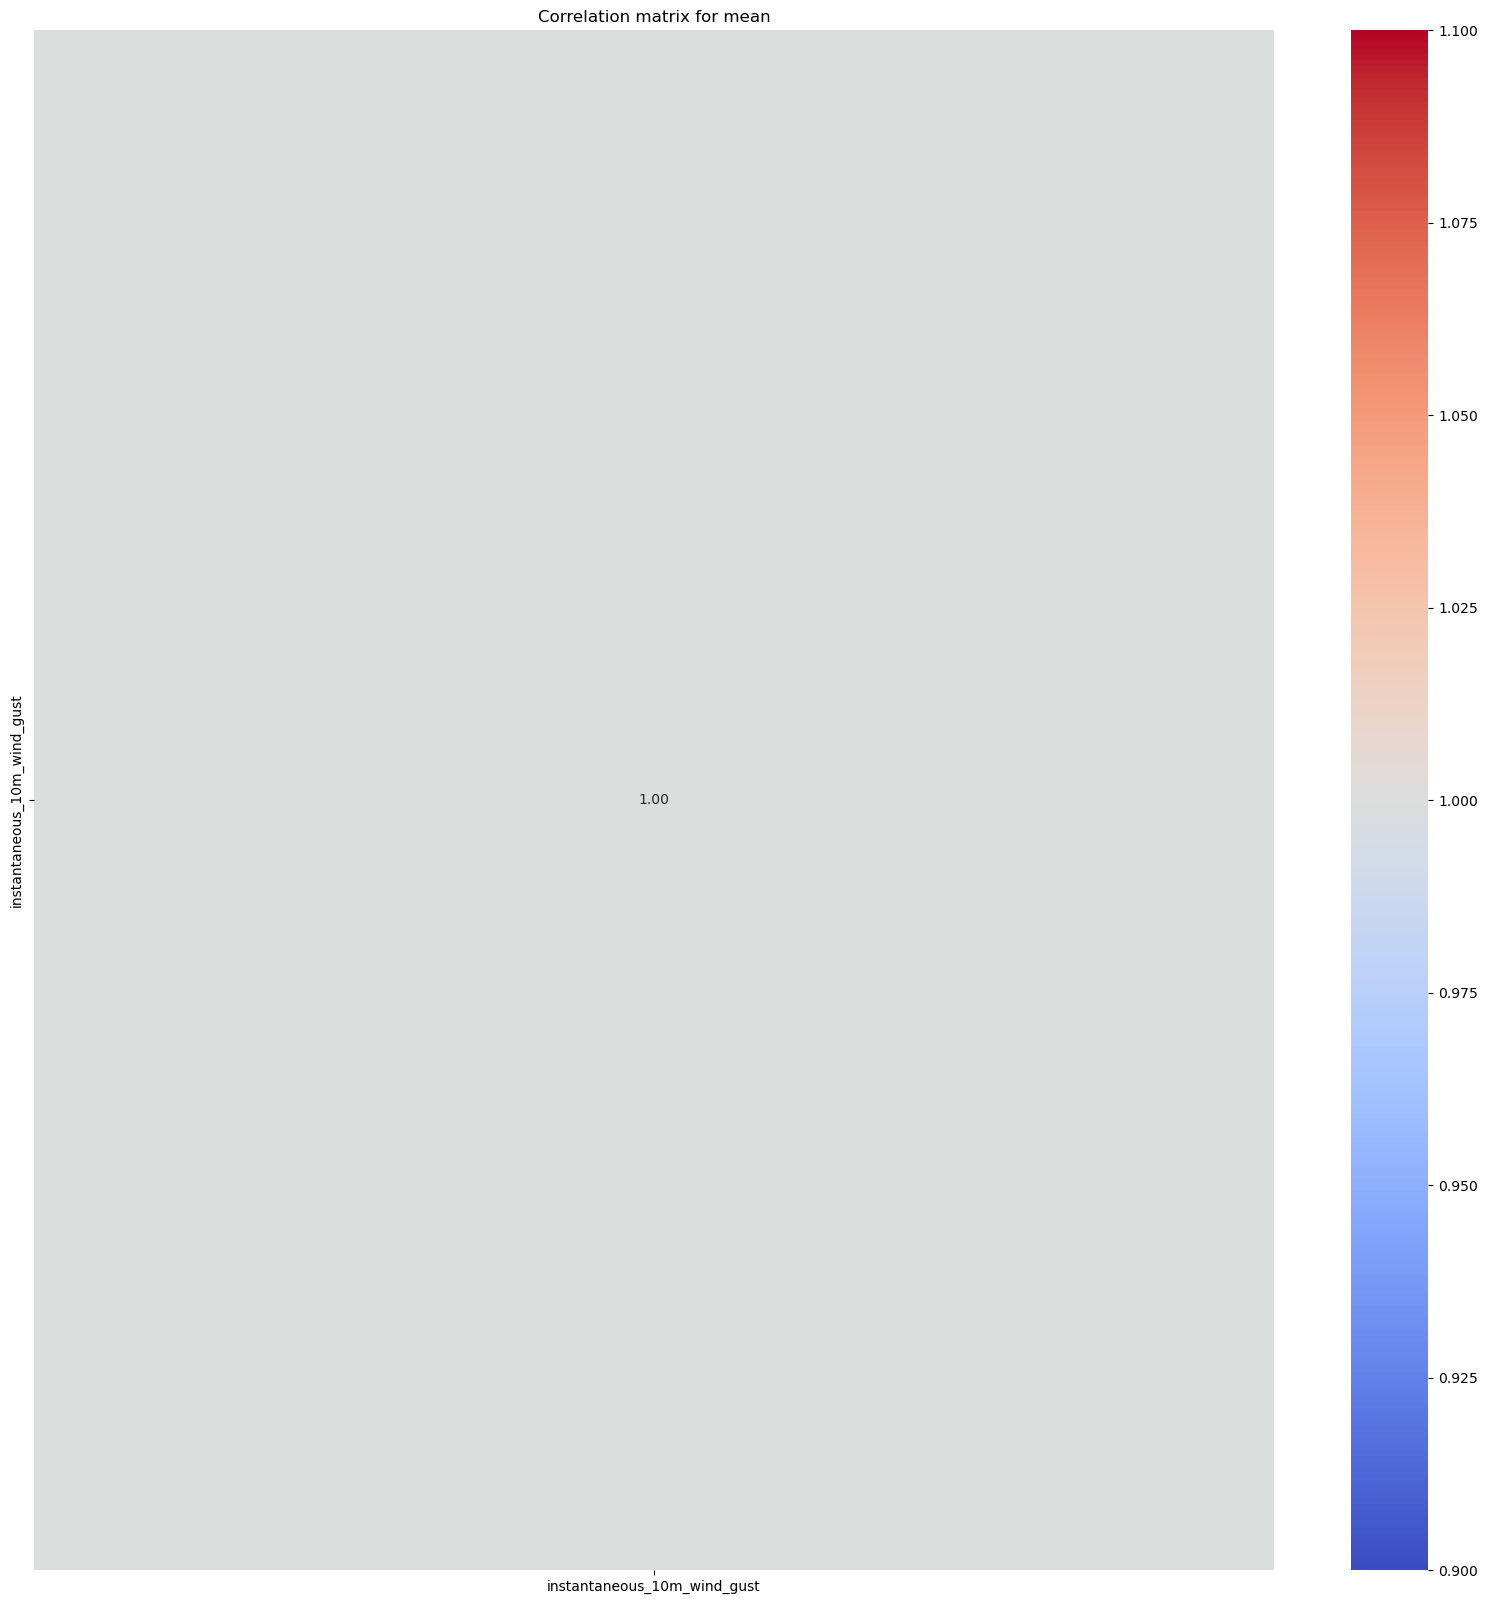

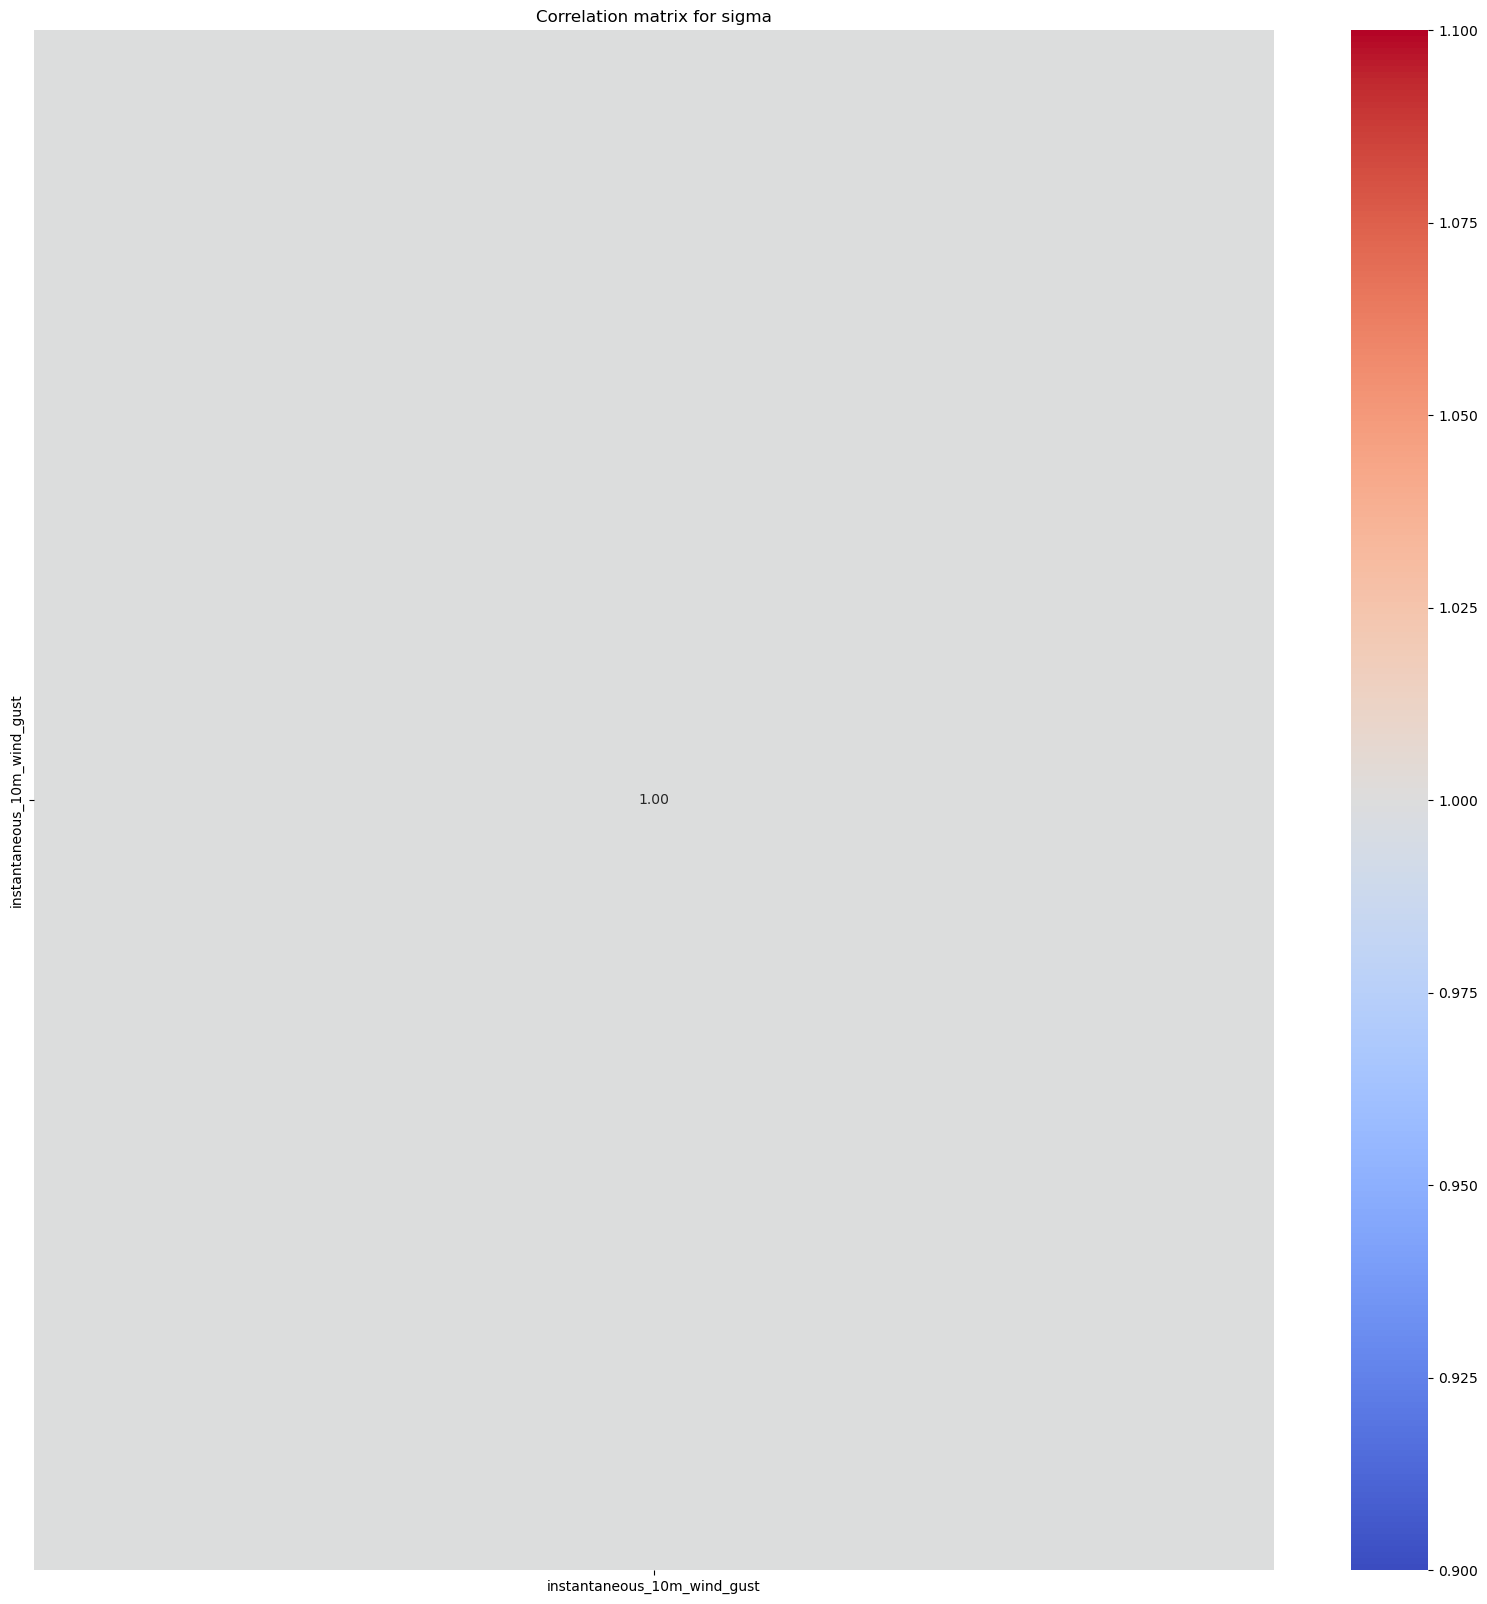

In [32]:
# just keep the instanteneous_10m_wind_gust in the correlation matrix
for stat in ['max', 'min', 'mean', 'sigma']:
    df = pd.DataFrame()
    for i in range(0, len(name_of_variables)):
        var_name = name_of_variables.iloc[i]
        if f'{stat}_{var_name}' in locals() and locals()[f'{stat}_{var_name}'] is not None:
            if var_name == 'instantaneous_10m_wind_gust':
                temp_df = locals()[f'{stat}_{var_name}'].reset_index(drop=True)
                temp_df.columns = [var_name]  # set the name of the DataFrame
                df = pd.concat([df, temp_df], axis=1)
    corr = df.corr()
    correlation_matrices[stat] = corr  # store the correlation matrix
    plt.figure(figsize=(20, 20))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation matrix for {stat}')
    # save figure
    #plt.savefig(f'/Users/fabienaugsburger/Documents/GitHub/master-project/case_study/inst_correlation_matrix_{stat}.png', dpi=500, bbox_inches='tight')
    plt.show()

In [35]:
# check the normality of the data

from scipy.stats import shapiro

for i in range(0, len(name_of_variables)):
    print(name_of_variables.iloc[i])
    print('max')
    print(shapiro(locals()[f'max_{name_of_variables.iloc[i]}']))
    print('min')
    print(shapiro(locals()[f'min_{name_of_variables.iloc[i]}']))
    print('mean')
    print(shapiro(locals()[f'mean_{name_of_variables.iloc[i]}']))
    print('sigma')
    print(shapiro(locals()[f'sigma_{name_of_variables.iloc[i]}']))

10m_u_component_of_wind
max
ShapiroResult(statistic=0.9537957474899439, pvalue=0.020401774802342395)
min
ShapiroResult(statistic=0.9276816839691483, pvalue=0.0012933428914092614)
mean
ShapiroResult(statistic=0.9625617596589263, pvalue=0.055782748854862126)
sigma
ShapiroResult(statistic=0.9583103954519574, pvalue=0.034115702988658674)
10m_v_component_of_wind
max
ShapiroResult(statistic=0.9318748979276017, pvalue=0.00196317871101747)
min
ShapiroResult(statistic=0.9834356074781813, pvalue=0.5674097697936322)
mean
ShapiroResult(statistic=0.9483163001165186, pvalue=0.01108207338009206)
sigma
ShapiroResult(statistic=0.9539906956222086, pvalue=0.020855619269660446)
2m_dewpoint_temperature
max
ShapiroResult(statistic=0.713246110143399, pvalue=1.0628617747351743e-09)
min
ShapiroResult(statistic=0.8639093994256996, pvalue=5.978381806952666e-06)
mean
ShapiroResult(statistic=0.8548867544424911, pvalue=3.1360338936852003e-06)
sigma
ShapiroResult(statistic=0.6993274517933814, pvalue=5.63659361282867

/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered i

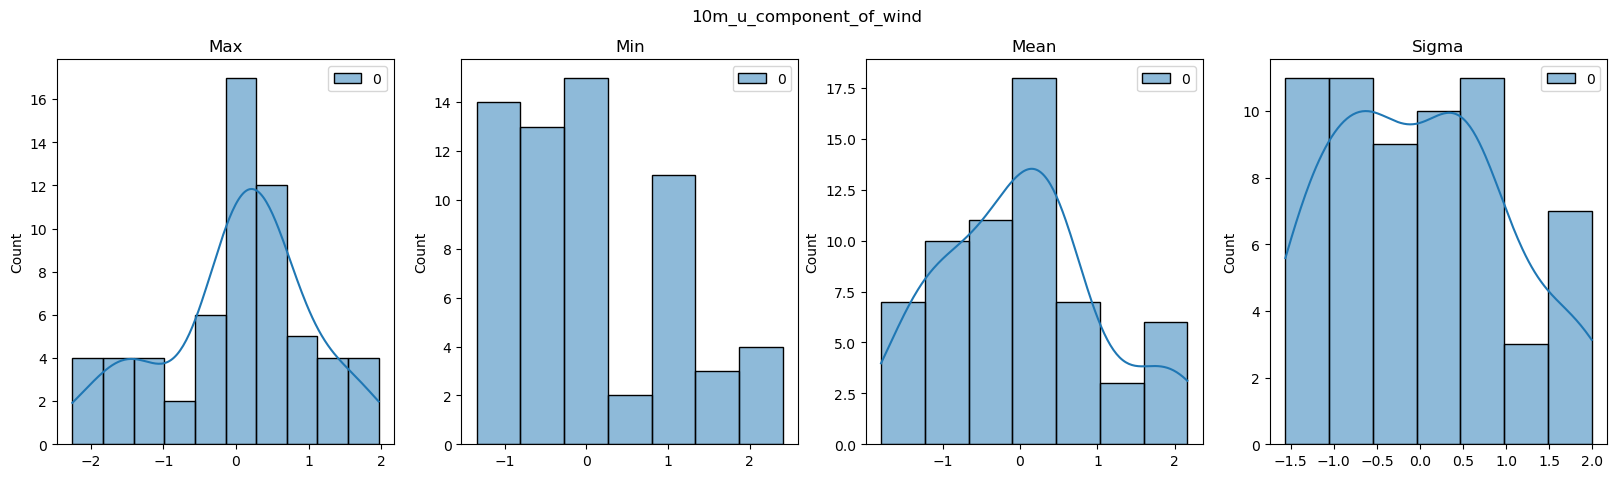

10m_u_component_of_wind


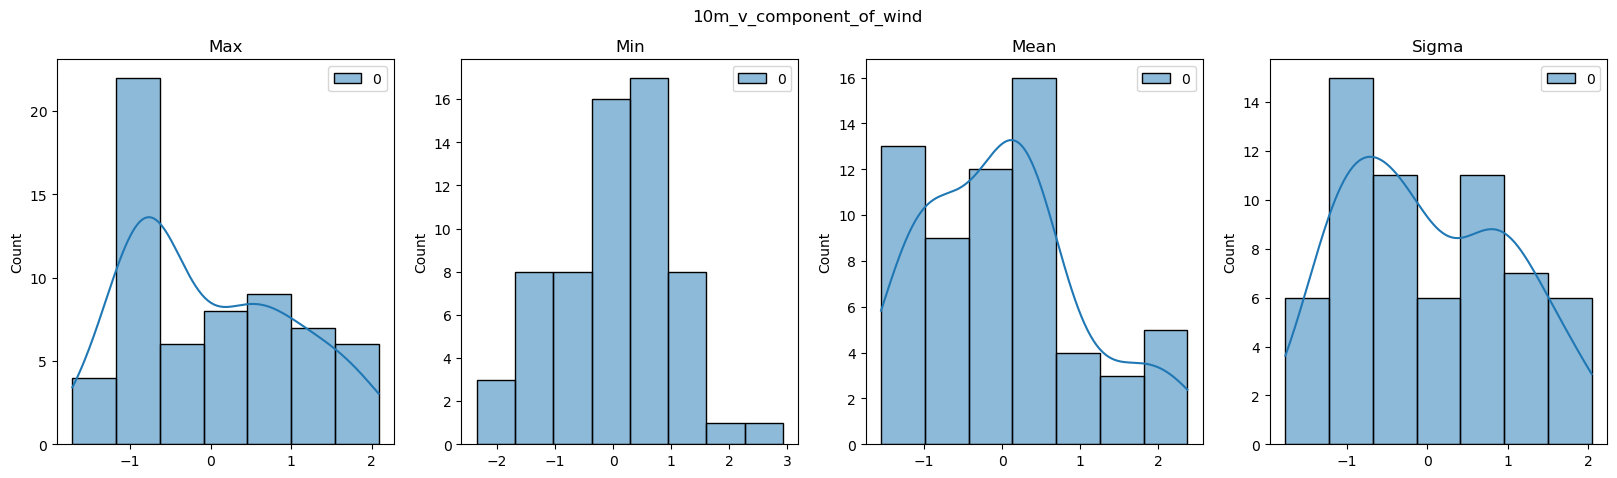

10m_v_component_of_wind


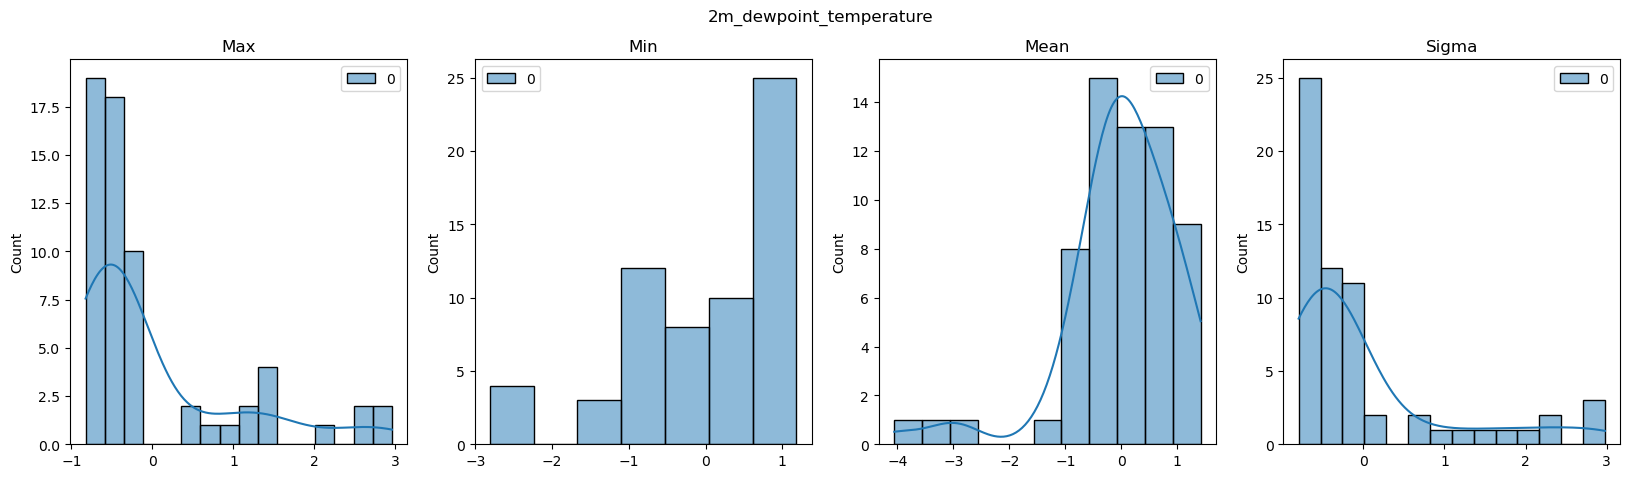

2m_dewpoint_temperature


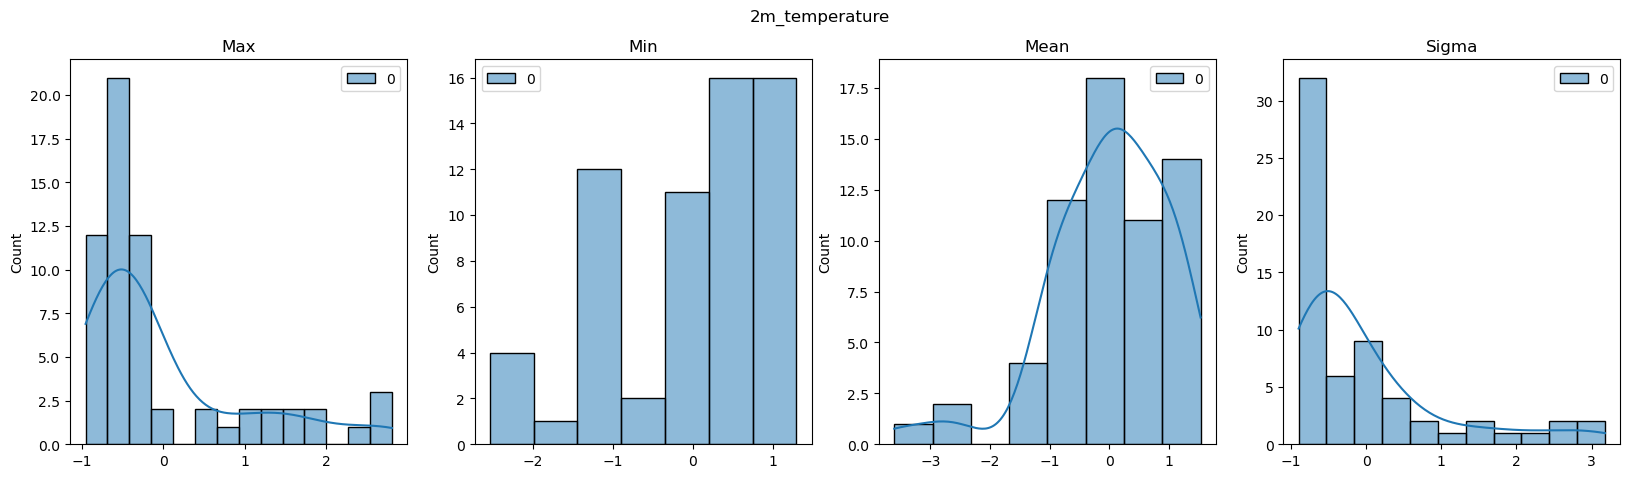

2m_temperature


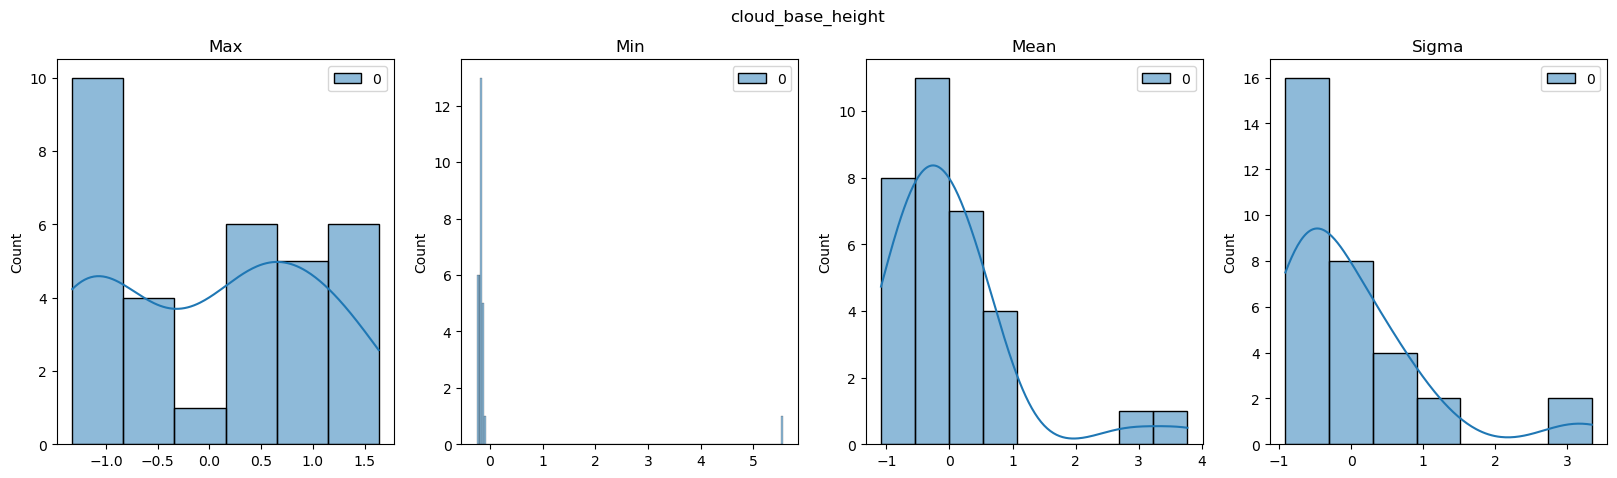

cloud_base_height


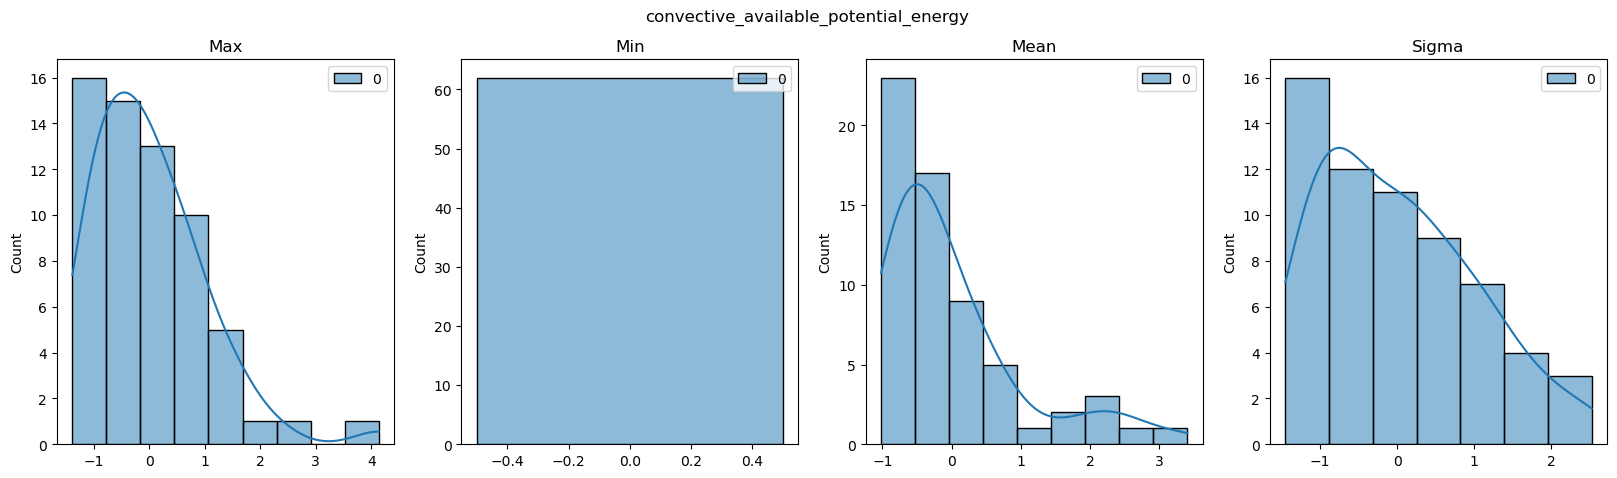

convective_available_potential_energy


ValueError: `dataset` input should have multiple elements.

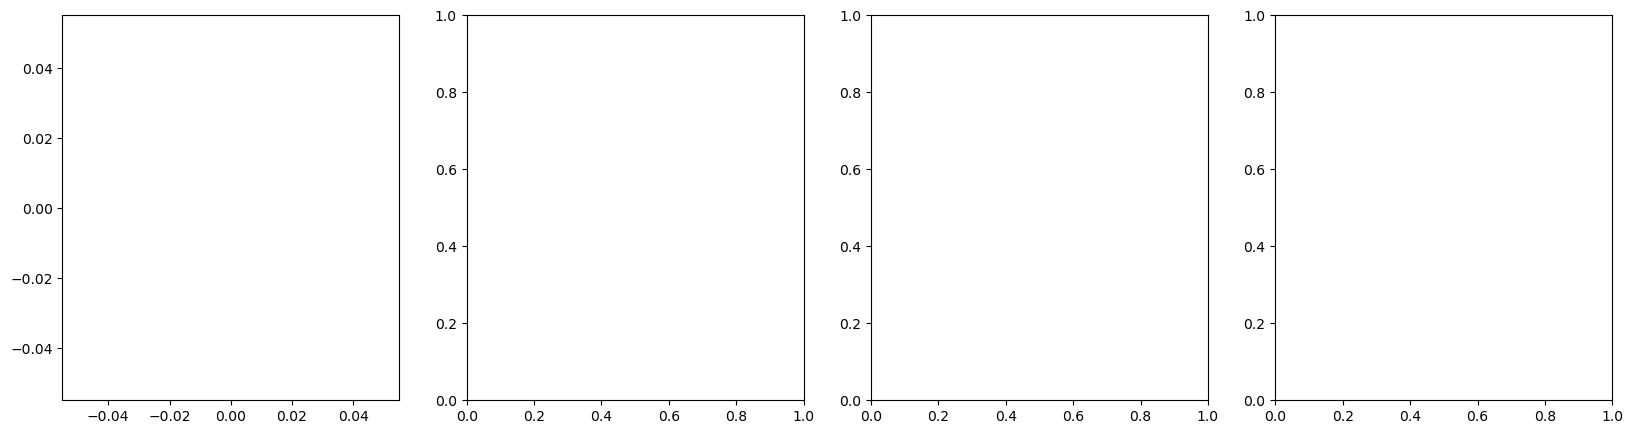

In [36]:
# normalize the data
from sklearn.preprocessing import StandardScaler

for i in range(0, len(name_of_variables)):
    scaler = StandardScaler()
    locals()[f'max_{name_of_variables.iloc[i]}'] = scaler.fit_transform(locals()[f'max_{name_of_variables.iloc[i]}'])
    locals()[f'min_{name_of_variables.iloc[i]}'] = scaler.fit_transform(locals()[f'min_{name_of_variables.iloc[i]}'])
    locals()[f'mean_{name_of_variables.iloc[i]}'] = scaler.fit_transform(locals()[f'mean_{name_of_variables.iloc[i]}'])
    locals()[f'sigma_{name_of_variables.iloc[i]}'] = scaler.fit_transform(locals()[f'sigma_{name_of_variables.iloc[i]}'])

# plot the normality of the data
    
for i in range(0, len(name_of_variables)):
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    sns.histplot(locals()[f'max_{name_of_variables.iloc[i]}'], kde=True, ax=ax[0])
    ax[0].set_title('Max')
    sns.histplot(locals()[f'min_{name_of_variables.iloc[i]}'], kde=False, ax=ax[1])
    ax[1].set_title('Min')
    sns.histplot(locals()[f'mean_{name_of_variables.iloc[i]}'], kde=True, ax=ax[2])
    ax[2].set_title('Mean')
    sns.histplot(locals()[f'sigma_{name_of_variables.iloc[i]}'], kde=True, ax=ax[3])
    ax[3].set_title('Sigma')
    plt.suptitle(name_of_variables.iloc[i])
    plt.show()
    print(name_of_variables.iloc[i])

In [37]:
# normality test

for i in range(0, len(name_of_variables)):
    print(name_of_variables.iloc[i])
    print('max')
    print(shapiro(locals()[f'max_{name_of_variables.iloc[i]}']))
    print('min')
    print(shapiro(locals()[f'min_{name_of_variables.iloc[i]}']))
    print('mean')
    print(shapiro(locals()[f'mean_{name_of_variables.iloc[i]}']))
    print('sigma')
    print(shapiro(locals()[f'sigma_{name_of_variables.iloc[i]}']))

# one-way ANOVA test 

10m_u_component_of_wind
max
ShapiroResult(statistic=0.9537957474899441, pvalue=0.020401774802342922)
min
ShapiroResult(statistic=0.927681683969148, pvalue=0.0012933428914092087)
mean
ShapiroResult(statistic=0.9625617596589263, pvalue=0.05578274885486222)
sigma
ShapiroResult(statistic=0.9583103954519574, pvalue=0.03411570298865858)
10m_v_component_of_wind
max
ShapiroResult(statistic=0.9318748979276013, pvalue=0.001963178711017392)
min
ShapiroResult(statistic=0.9834356074781816, pvalue=0.5674097697936481)
mean
ShapiroResult(statistic=0.9483163001165186, pvalue=0.01108207338009206)
sigma
ShapiroResult(statistic=0.953990695622209, pvalue=0.020855619269661403)
2m_dewpoint_temperature
max
ShapiroResult(statistic=0.713246110143399, pvalue=1.0628617747351743e-09)
min
ShapiroResult(statistic=0.8639093994256998, pvalue=5.978381806952745e-06)
mean
ShapiroResult(statistic=0.8548867544424908, pvalue=3.1360338936851304e-06)
sigma
ShapiroResult(statistic=0.6993274517933816, pvalue=5.63659361282871e-1

/Users/fabienaugsburger/anaconda3/envs/master/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
